In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

import warnings
warnings.filterwarnings('ignore')

In [123]:
df_application = pd.read_csv('application_data.csv')

In [125]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
df_application.shape

(307511, 122)

In [132]:
df_application.columns
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [136]:
##Kind of data stored into this
df_application.dtypes
df_application.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [138]:
### Handling missing values by finding out columns with more than 60 null values
nacols = pd.DataFrame(df_application.isnull().mean().round(4)*100, columns = ["percentage_missing_values"]).sort_values(by=['percentage_missing_values'])
print(nacols)

                             percentage_missing_values
SK_ID_CURR                                        0.00
HOUR_APPR_PROCESS_START                           0.00
REG_REGION_NOT_WORK_REGION                        0.00
LIVE_REGION_NOT_WORK_REGION                       0.00
REG_CITY_NOT_LIVE_CITY                            0.00
...                                                ...
NONLIVINGAPARTMENTS_MEDI                         69.43
NONLIVINGAPARTMENTS_MODE                         69.43
COMMONAREA_MODE                                  69.87
COMMONAREA_AVG                                   69.87
COMMONAREA_MEDI                                  69.87

[122 rows x 1 columns]


In [140]:
#Removing row wise null values

narows = pd.DataFrame(df_application.isnull().sum(axis=1),columns=['row_missing_values'])
print(narows)

        row_missing_values
0                        1
1                        2
2                       48
3                       56
4                       50
...                    ...
307506                   8
307507                  10
307508                   4
307509                  30
307510                  17

[307511 rows x 1 columns]


In [142]:
## Dropping these 64 columns
##cleaned_columns =list(nacol[nacol.values>60].index)
##df_application.drop(labels='EXT_SOURCE_1',axis=1,inplace='True')
##print(len(nacol))

df_application1 = df_application.drop(df_application.columns[df_application.apply(lambda col:(col.isnull().sum()/len(df_application)*100)>50)],axis=1)
print(df_application1)


        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [144]:
#It can be noticed that noew there are 81rows as compared to 122 earlier

view = round(100*df_application1.isnull().sum()/len(df_application1),2).sort_values()
print(view)

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
                                ...  
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_AVG                   49.76
Length: 81, dtype: float64


<Axes: >

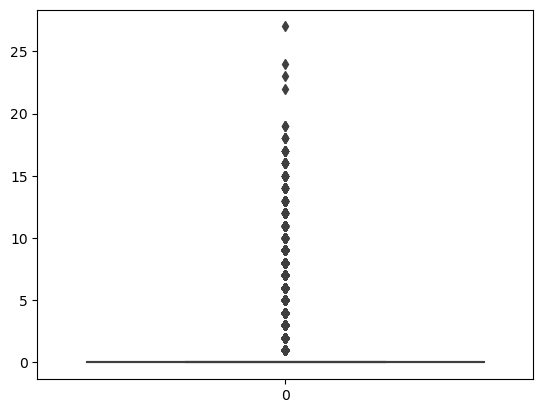

In [145]:
#Imputing data with 13% of missing value - Used Google Collab to get a sesne of this

#Target columns for imoutation are - 
        #AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
        #AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR 
    #AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY
    
#Since all of the have the same % of missing values

#Imputation for AMT_REQ_CREDIT_BUREAU_MON
sns.boxplot(df_application1['AMT_REQ_CREDIT_BUREAU_MON'])

In [147]:
#since the data is impacted by outliers, we will figure out another way for imputing the values
#ets understand the count of all the values

df_application1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [148]:
#we can notice above that majority of data has 0 as their values. hence we will imputethe missing values with 0. - Ww are using Mode Imptation method

#lets find the number of missing values in this data set
df_application1['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [149]:
#lets get a better understand of values 
df_application1['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True*100)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
23.0    0.000004
27.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [150]:
#lets check the stats of this column
df_application1['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [152]:
#since this dataset has high 0s present (83%) we will use imputation method
import pandas as pd

# Assuming df is your DataFrame and 'AMT_REQ_CREDIT_BUREAU_MON' is the column with missing values
# Replace missing values in 'AMT_REQ_CREDIT_BUREAU_MON' with the mode
df_application1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)

df_application1['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [158]:
#We do the same thing for rest of the identified columns
df_application1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)
df_application1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)
df_application1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)
df_application1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)
df_application1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)
df_application1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_application1['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)


<Axes: >

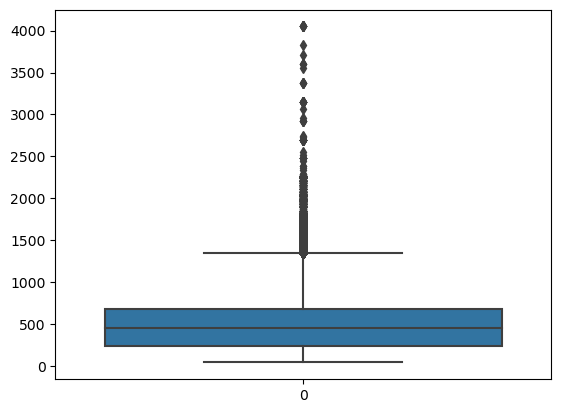

In [159]:
#Outlier Technnique - box plot

sns.boxplot(df_application1['AMT_GOODS_PRICE']/1000.0)



In [160]:
df_application1['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [245]:
df_application1['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

NameError: name 'new_app' is not defined

In [163]:
##Columns that have no impact/significance in the analysis

colsdel = ['FLAG_WORK_PHONE',
                   'REG_CITY_NOT_LIVE_CITY','HOUR_APPR_PROCESS_START','FLAG_PHONE','REG_CITY_NOT_WORK_CITY','FLAG_MOBIL','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','LIVE_REGION_NOT_WORK_REGION','DAYS_REGISTRATION','FLAG_EMAIL','FLAG_CONT_MOBILE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START']
colsdel


['FLAG_WORK_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'HOUR_APPR_PROCESS_START',
 'FLAG_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_MOBIL',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'DAYS_REGISTRATION',
 'FLAG_EMAIL',
 'FLAG_CONT_MOBILE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START']

In [247]:
new_app_filtered = df_application.drop(columns=colsdel)
new_app_filtered.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
new_app_filtered.shape

(307511, 104)

In [192]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
##.mean() calculates the mean of each column. Since True is treated as 1 and False as 0 in numeric calculations, the mean effectively gives the proportion of True values in each column. 

nulcol = pd.DataFrame(new_app_filtered.isnull().mean().round(4)*100, columns = ['percent_missing_values']).sort_values(by=['percent_missing_values'])
nulcol.describe

<bound method NDFrame.describe of                             percent_missing_values
SK_ID_CURR                                    0.00
REG_REGION_NOT_WORK_REGION                    0.00
ORGANIZATION_TYPE                             0.00
FLAG_DOCUMENT_21                              0.00
FLAG_DOCUMENT_20                              0.00
...                                            ...
NONLIVINGAPARTMENTS_MODE                     69.43
NONLIVINGAPARTMENTS_MEDI                     69.43
COMMONAREA_MODE                              69.87
COMMONAREA_AVG                               69.87
COMMONAREA_MEDI                              69.87

[104 rows x 1 columns]>

In [249]:
new_app_filtered['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [250]:
# Convert DAYS_BIRTH into "Age" 

new_app_filtered['AGE'] = abs(new_app_filtered['DAYS_BIRTH']//365)

In [251]:
# Drop 'DAYS_BIRTH' column
new_app_filtered = new_app_filtered.drop(['DAYS_BIRTH'],axis=1)

In [252]:
#Converting DAYS_EMPLOYED column into YEARS_EMPLOYED column - absolute value
new_app_filtered['YEARS_EMPLOYED'] = abs(new_app_filtered['DAYS_EMPLOYED']//365)

In [253]:
# Drop 'DAYS_EMPLOYED' column
new_app_filtered = new_app_filtered.drop(['DAYS_EMPLOYED'],axis=1)

In [258]:
##Creatings BINS for age, income, gender


# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [260]:
#Creating new column AGE_GROUP
new_app_filtered['AGE_GROUP'] = new_app_filtered['AGE'].apply(age_group)
new_app_filtered.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,26,2,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,46,4,Mid Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,53,1,Mid Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,53,9,Mid Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,Mid Age


In [261]:
#Creating three credit amount groups - High, medium and low
round(new_app_filtered['AMT_CREDIT'].describe(),2)


count     307511.00
mean      599026.00
std       402490.78
min        45000.00
25%       270000.00
50%       513531.00
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [262]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'


In [263]:
new_app_filtered['CREDIT_GROUP'] = new_app_filtered['AMT_CREDIT'].apply(credit_group)
new_app_filtered.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,26,2,Young,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,46,4,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53,1,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,53,9,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,55,9,Mid Age,Medium


In [264]:
#Creating three income groups - Hign, medium and Low
new_app_filtered['AMT_INCOME_TOTAL'].describe()


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [265]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'


In [266]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
new_app_filtered['INCOME_GROUP'] = new_app_filtered['AMT_INCOME_TOTAL'].apply(income_group)
new_app_filtered.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,26,2,Young,Low,High
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,46,4,Mid Age,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,53,1,Mid Age,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,53,9,Mid Age,Low,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,55,9,Mid Age,Medium,Medium


In [267]:
## Exteranl source
new_app_filtered['EXT_SOURCE_SCORE'] = round(((new_app_filtered['EXT_SOURCE_2'] + new_app_filtered['EXT_SOURCE_3'])/2),2)
new_app_filtered.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,26,2,Young,Low,High,0.20
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,46,4,Mid Age,High,High,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,53,1,Mid Age,Low,Low,0.64
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,53,9,Mid Age,Low,Medium,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,55,9,Mid Age,Medium,Medium,NaN


In [268]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
new_app_filtered.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)


In [269]:
#Creating three External source score groups - High, Medium and Low
new_app_filtered['EXT_SOURCE_SCORE'].describe()


count    246116.000000
mean          0.514686
std           0.142992
min           0.000000
25%           0.420000
50%           0.530000
75%           0.620000
max           0.840000
Name: EXT_SOURCE_SCORE, dtype: float64

In [270]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'


In [271]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
new_app_filtered['EXT_SCORE_CATEGORY'] = new_app_filtered['EXT_SOURCE_SCORE'].apply(ext_source_group)
new_app_filtered.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,26,2,Young,Low,High,0.20,Low
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,46,4,Mid Age,High,High,NaN,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,53,9,Mid Age,Low,Medium,NaN,High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,55,9,Mid Age,Medium,Medium,NaN,High


In [272]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
new_app_filtered = new_app_filtered[~(new_app_filtered['CODE_GENDER'] == 'XNA')]


In [274]:
#Divide data into two sets
#Client with payment difficulties (Target=1)
#All other cases (Target=0)
# Client with payment difficulties (Target=1)
new_app_filtered_target_1 = new_app_filtered[new_app_filtered['TARGET'] == 1]
new_app_filtered_target_1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,26,2,Young,Low,High,0.20,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0.0,2.0,2.0,52,8,Mid Age,High,Medium,0.37,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,2.0,0.0,4.0,48,4,Mid Age,High,High,0.31,Low
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0.0,0.0,2.0,37,10,Young,Low,Medium,0.54,Medium
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0.0,0.0,0.0,68,1000,Senior,Low,Low,0.37,Low


In [276]:
# Client with all other cases (Target=0)
new_app_filtered_target_0 = new_app_filtered[new_app_filtered['TARGET'] == 0]
new_app_filtered_target_0.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,46,4,Mid Age,High,High,NaN,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,53,1,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,53,9,Mid Age,Low,Medium,NaN,High
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,55,9,Mid Age,Medium,Medium,NaN,High
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,1.0,1.0,47,5,Mid Age,Low,Low,0.49,Medium


In [277]:
new_app_filtered_target_0.shape

(282682, 107)

In [278]:
new_app_filtered_target_1.shape

(24825, 107)

[Text(0.5, 0, 'Gender')]

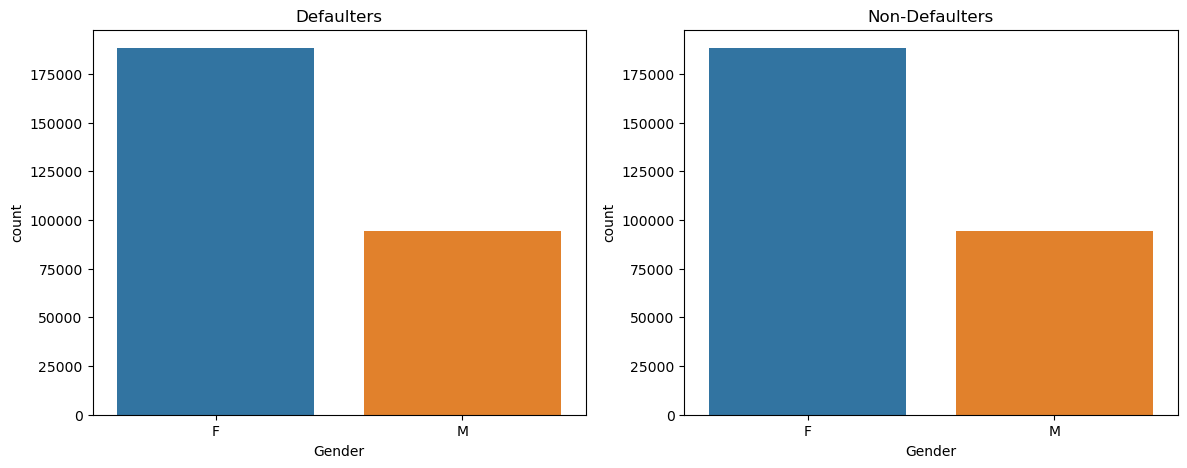

In [279]:
#Analysis
#Univariate analysis for Unordered categorical variables
#Count of defaulters and non-defaulters on the basis of gender
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)   
ax = sns.countplot(x = 'CODE_GENDER',data=new_app_filtered_target_0)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=new_app_filtered_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

[Text(0.5, 0, 'Loan type')]

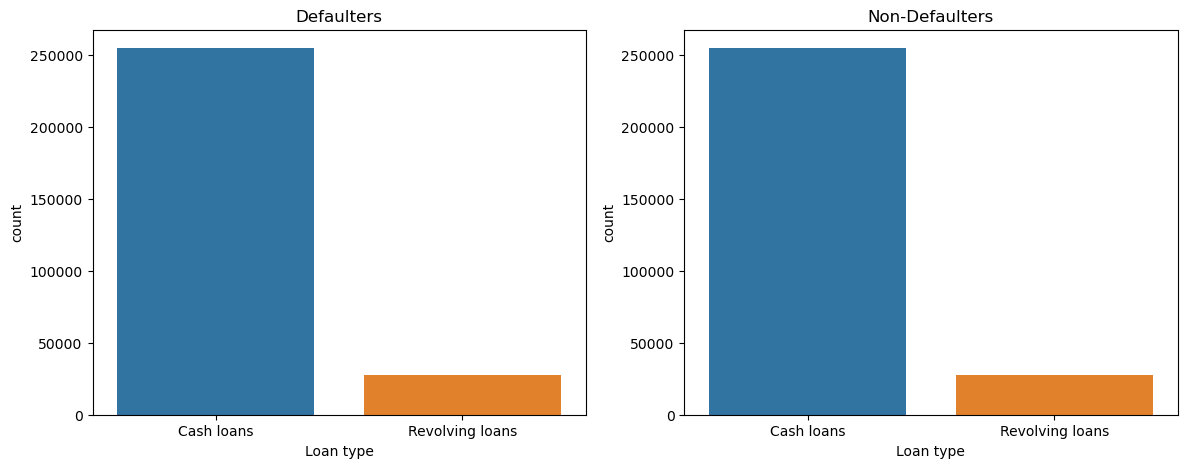

In [151]:
#Analysis
#Defaluters - We can see that females are slightly more in number of defaulters than male.
#Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.
#Defaulters and non-defaulters on the basis of Loan type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=new_app_filtered_target_0)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=new_app_filtered_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')


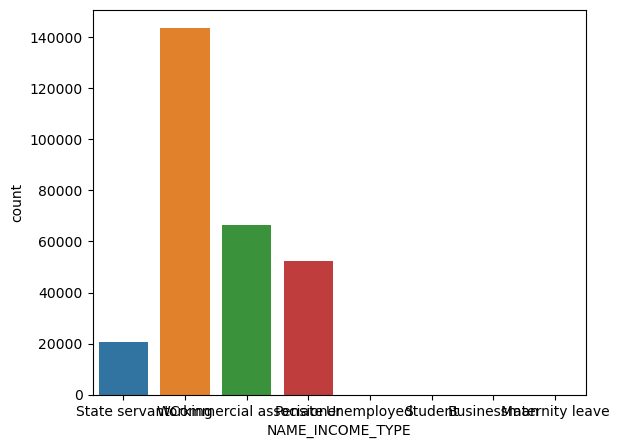

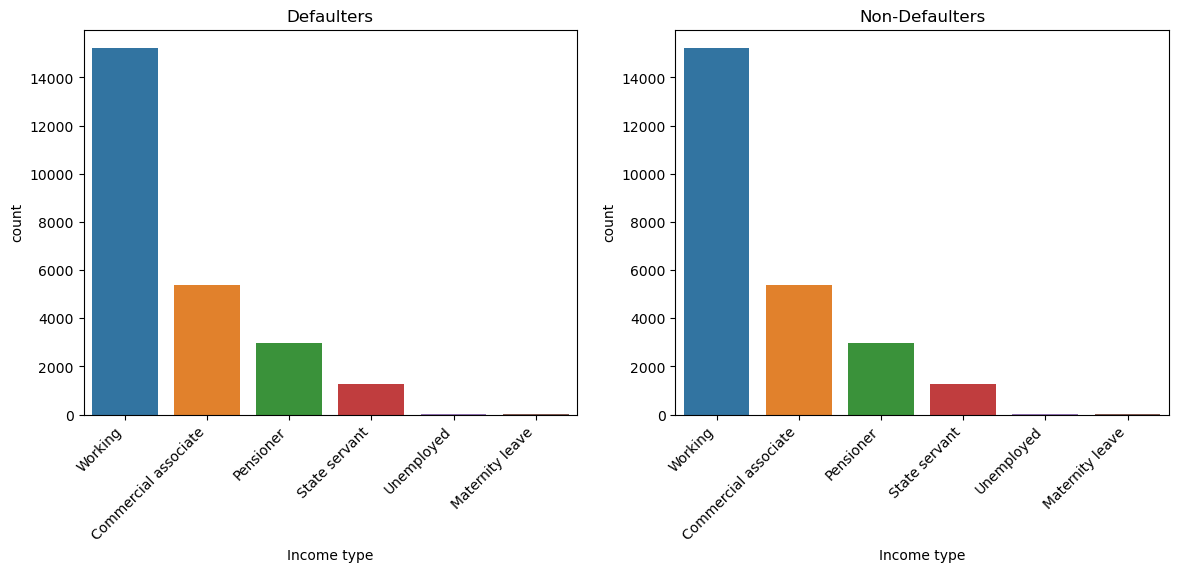

In [280]:
#Analysis
#We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=new_app_filtered_target_0)
#We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=new_app_filtered_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=new_app_filtered_target_1)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

<Figure size 1400x500 with 0 Axes>

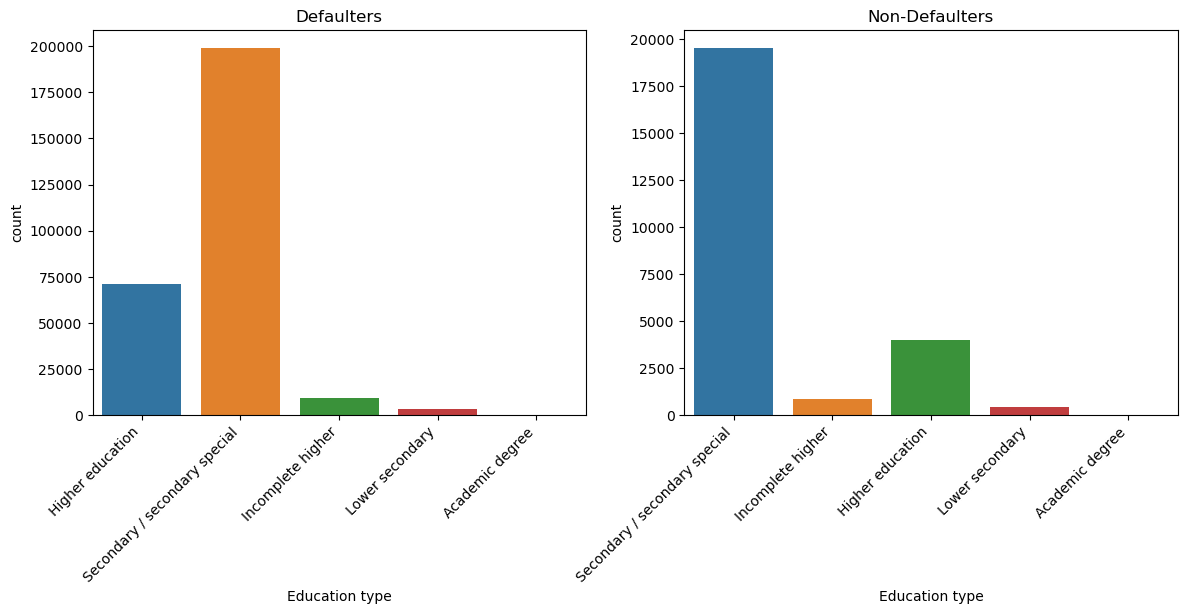

In [169]:
#Analysis
#We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(14,5))

#Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=new_app_filtered_target_0)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=new_app_filtered_target_1)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

<Figure size 1400x500 with 0 Axes>

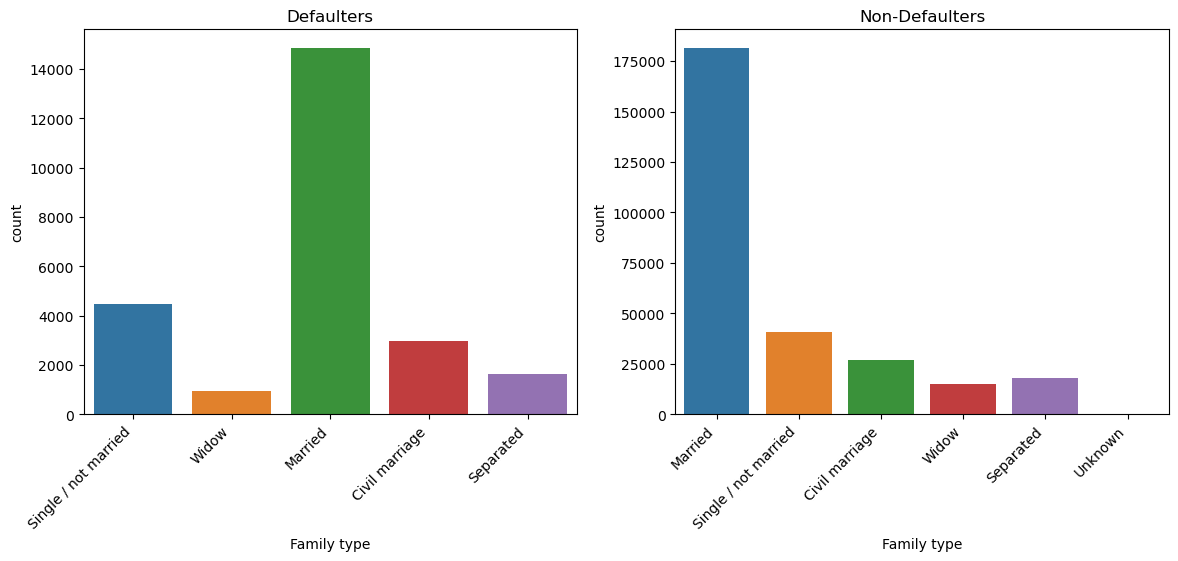

In [281]:
#Analysis
#We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(14,5))


#Defaulters and non-defaulters on the basis of Income type
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=new_app_filtered_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=new_app_filtered_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

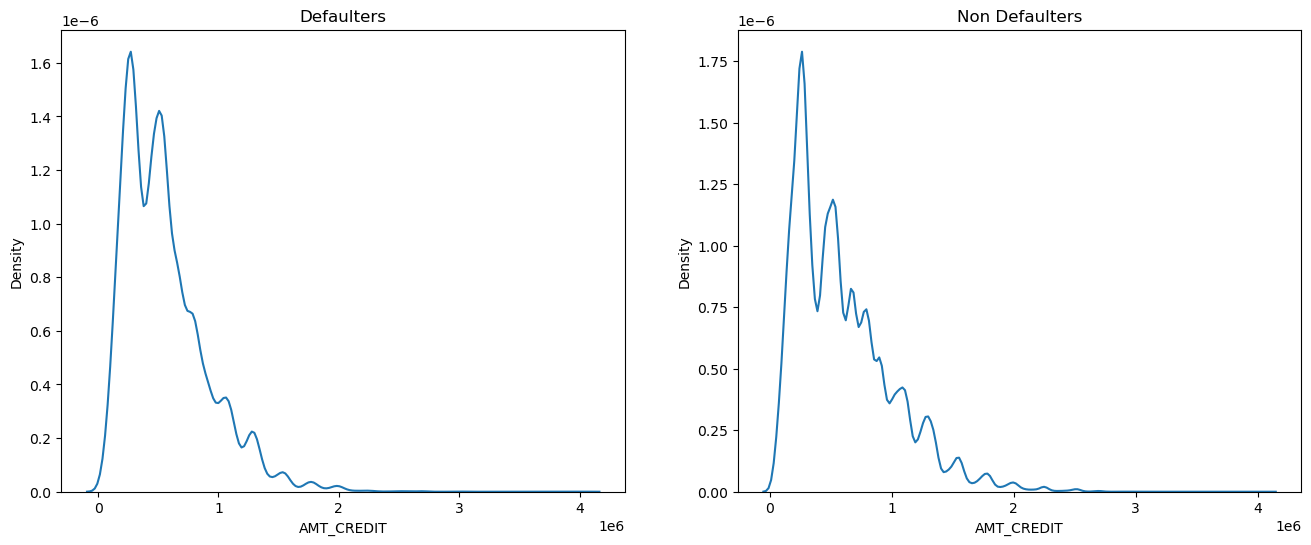

In [282]:
#Univariate analysis for continious variables
#Defaulters and non-defaulters on the basis of credit amount of the loan
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(new_app_filtered_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(new_app_filtered_target_0['AMT_CREDIT'],hist=False)


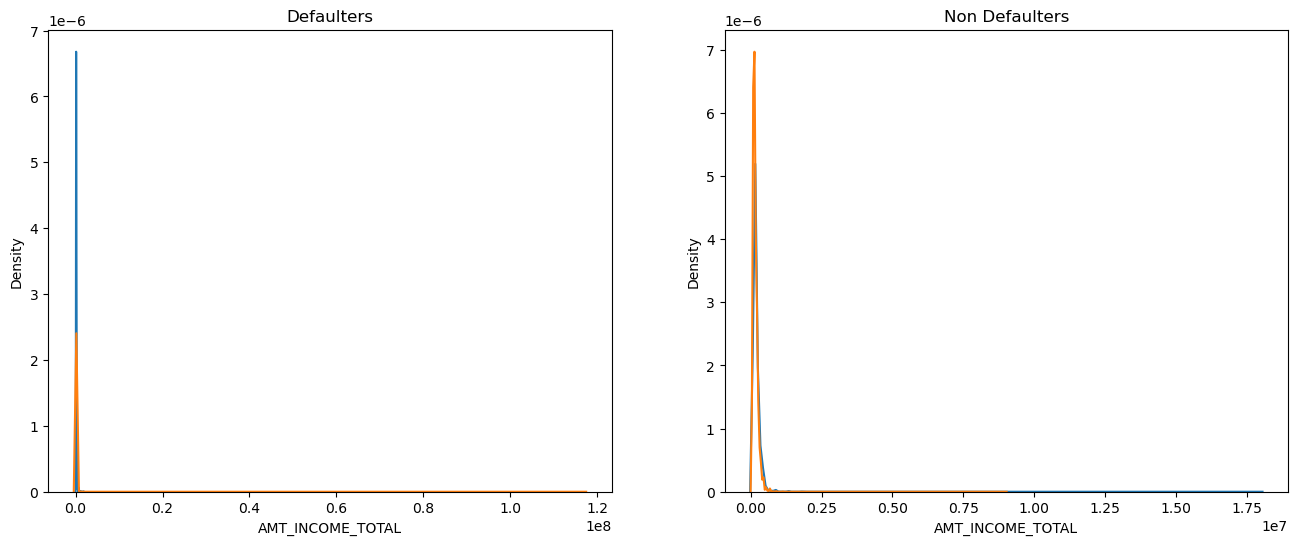

In [299]:
#Analysis
#Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
#Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.
#Defaulters and non-defaulters on the basis of gender and their total income
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = new_app_filtered_target_1[new_app_filtered_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2)
plt.title('Non Defaulters')
for i in gender:
    subset = new_app_filtered_target_0[new_app_filtered_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

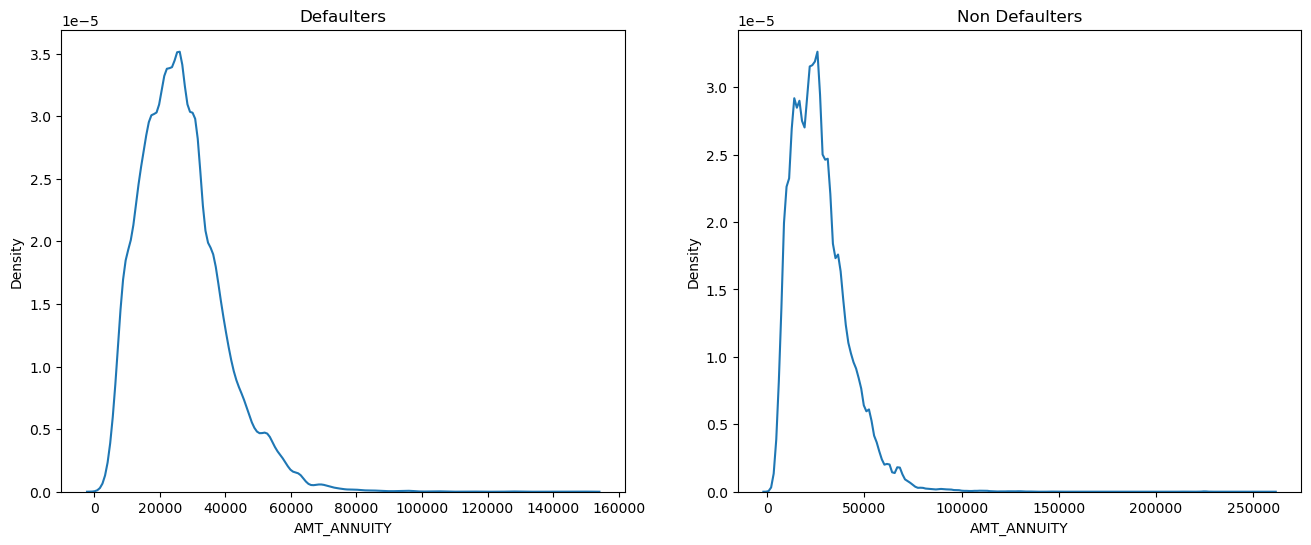

In [300]:
#Analysis
#Defaulters - We can notice by looking at the pattern that for being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.
#Non defaulters - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.
#Defaulters and non-defaulters on the basis of Loan annuity
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(new_app_filtered_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(new_app_filtered_target_0['AMT_ANNUITY'],hist=False)


In [303]:
#Segmented Univariate analysis 

#Percentage of age group - default and non-defaulters 
#The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and not defaulted.

# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(new_app_filtered[(new_app_filtered['AGE_GROUP'] == 'Young') & (new_app_filtered['TARGET'] == 1)])/len(new_app_filtered[new_app_filtered['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(new_app_filtered[(new_app_filtered['AGE_GROUP'] == 'Mid Age') & (new_app_filtered['TARGET'] == 1)])/len(new_app_filtered[new_app_filtered['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(new_app_filtered[(new_app_filtered['AGE_GROUP'] == 'Senior') & (new_app_filtered['TARGET'] == 1)])/len(new_app_filtered[new_app_filtered['AGE_GROUP'] == 'Senior']),2)


In [305]:
# Creating a dataframe of the defaulted age group percentage
default_agegroup_ = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]}
default_agegroup_ = pd.DataFrame(default_agegroup_) 
default_agegroup_


,AGE_GROUP,Percentage
0,Young,10.39
1,Mid Age,7.07
2,Senior,5.04


In [306]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(new_app_filtered[(new_app_filtered['AGE_GROUP'] == 'Young') & (new_app_filtered['TARGET'] == 0)])/len(new_app_filtered[new_app_filtered['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(new_app_filtered[(new_app_filtered['AGE_GROUP'] == 'Mid Age') & (new_app_filtered['TARGET'] == 0)])/len(new_app_filtered[new_app_filtered['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(new_app_filtered[(new_app_filtered['AGE_GROUP'] == 'Senior') & (new_app_filtered['TARGET'] == 0)])/len(new_app_filtered[new_app_filtered['AGE_GROUP'] == 'Senior']),2)

In [307]:
# Creating a dataframe of the non defaulted age group percentage
#Here, pd.DataFrame(data) creates a DataFrame from a dictionary where keys are column names and values are lists containing column data.

nondefault_age_group= {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nd = pd.DataFrame(nondefault_age_group) 
df_agegroup_nd


,AGE_GROUP,Percentage
0,Young,89.61
1,Mid Age,92.93
2,Senior,94.96


Text(0.5, 1.0, 'Non-Defaulters')

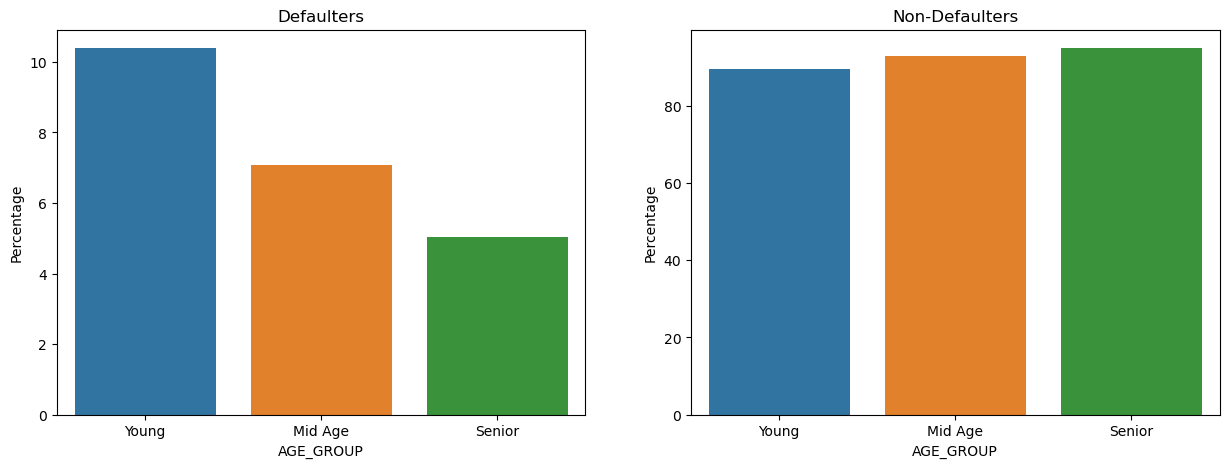

In [309]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=default_agegroup_)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_nd)
plt.title('Non-Defaulters')


Text(0.5, 1.0, 'Non-Defaulters')

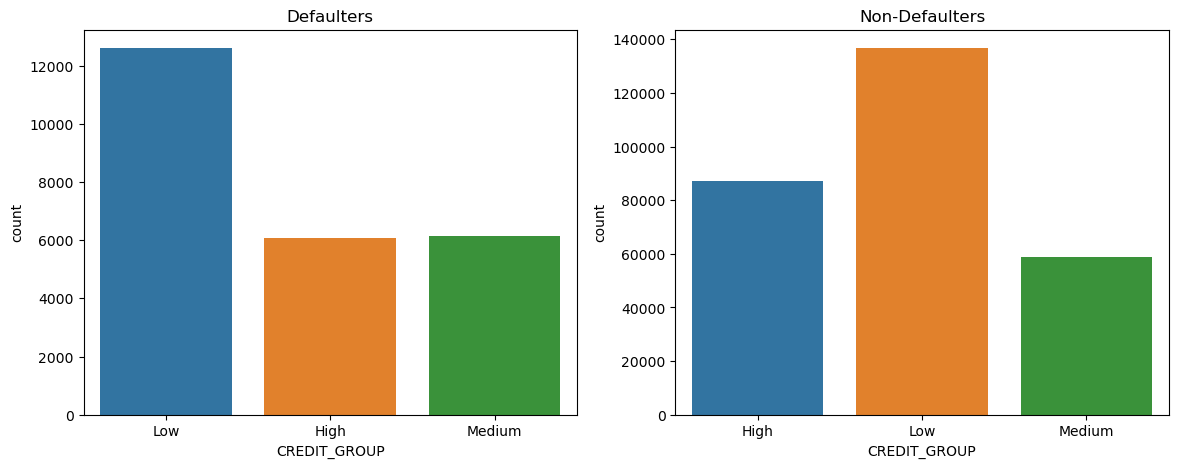

In [310]:
#Analysis of the above chart
#Defaulters - We see that Young people are more likely to default than other two age groups and Senior citizens are less likely to default than others.
#Non-defaulters - It is almost the same for every age group
#Credit amount group
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=new_app_filtered_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=new_app_filtered_target_0)
plt.title('Non-Defaulters')

Text(0.5, 1.0, 'Non-Defaulters')

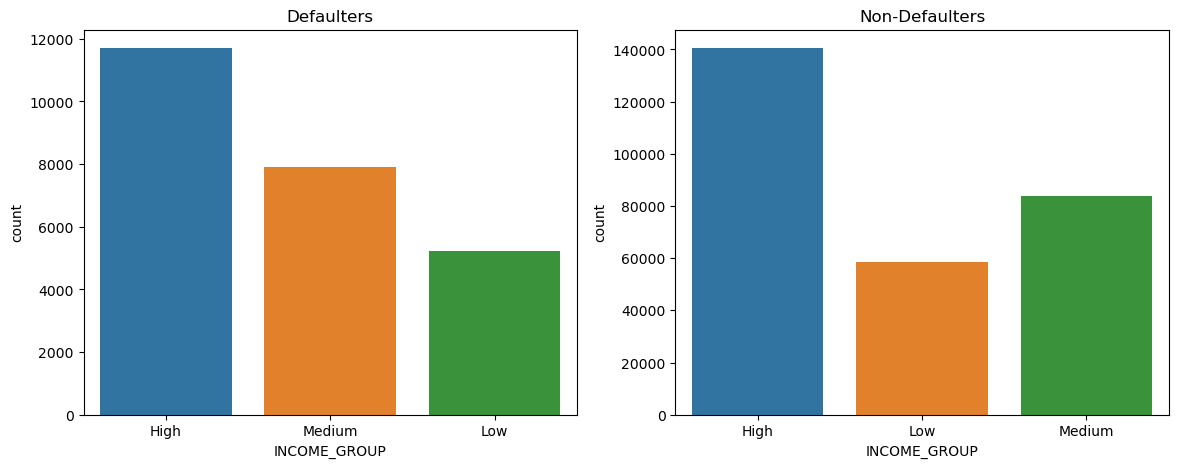

In [311]:
#Analysis of the above chart:
#Defaulters - low credited amount groups default more than high and medium credit amount.
#Non defaulters -Low credit amount groups are more in number

##Income group
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=new_app_filtered_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=new_app_filtered_target_0)
plt.title('Non-Defaulters')


Text(0.5, 1.0, 'Non-Defaulters')

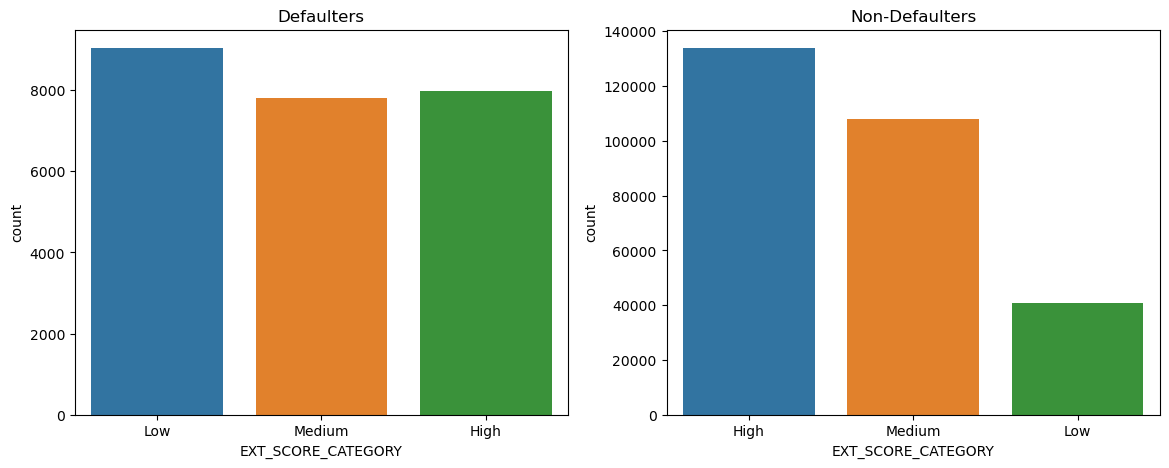

In [313]:
#Analysis of the above chart
#Defaulters - High income group defaults more than Medium and Low Income Groups.
#Non defaulters - Non defaulters more in High income group and less in low income group.




###Normalized score from external data source
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=new_app_filtered_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=new_app_filtered_target_0)
plt.title('Non-Defaulters')


In [314]:
#Analysis of the above chart:
#Defaulters - low scorer from external data source are more defaulters. Also, the medium scorer are low scorers.
#Non defaulters - Medium scorers are not more defaulted than High scorer.

######Bivariate analysis
#Corelation of relevant numerical columns for defaulters and nondefaulters
# Listing the relevant columns for finding corelation
correlation_columns = ['AMT_CREDIT', 'AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']


In [315]:
#Corelation of defaulters
#Lets create dataframe for numerical columns
df_cotarget_1 = new_app_filtered_target_1[correlation_columns]
df_cotarget_1.head()


,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
0,406597.5,202500.0,351000.0,24700.5,351000.0,26,0.20,2
26,979992.0,112500.0,702000.0,27076.5,702000.0,52,0.37,3
40,1193580.0,202500.0,855000.0,35028.0,855000.0,48,0.31,2
42,288873.0,135000.0,238500.0,16258.5,238500.0,37,0.54,3
81,252000.0,81000.0,252000.0,14593.5,252000.0,68,0.37,2


In [321]:
# Corelation matrix
df_cotarget_1.corr() 


,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_CREDIT,1.000000,0.038131,0.983103,0.752195,0.983103,0.135044,0.131768,-0.059193
AMT_INCOME_TOTAL,0.038131,1.000000,0.037583,0.046421,0.037583,-0.003158,-0.007805,-0.021486
AMT_GOODS_PRICE,0.983103,0.037583,1.000000,0.752699,1.000000,0.135578,0.139405,-0.066390
AMT_ANNUITY,0.752195,0.046421,0.752699,1.000000,0.752699,0.013984,0.104152,-0.073784
AMT_GOODS_PRICE,0.983103,0.037583,1.000000,0.752699,1.000000,0.135578,0.139405,-0.066390
AGE,0.135044,-0.003158,0.135578,0.013984,0.135578,1.000000,0.184436,-0.033583
EXT_SOURCE_SCORE,0.131768,-0.007805,0.139405,0.104152,0.139405,0.184436,1.000000,-0.169328
REGION_RATING_CLIENT,-0.059193,-0.021486,-0.066390,-0.073784,-0.066390,-0.033583,-0.169328,1.000000


plt.figure(figsize=(10,8))
sns.heatmap(df_cotarget_1.corr(),cmap="corr",annot=True)

<Axes: >

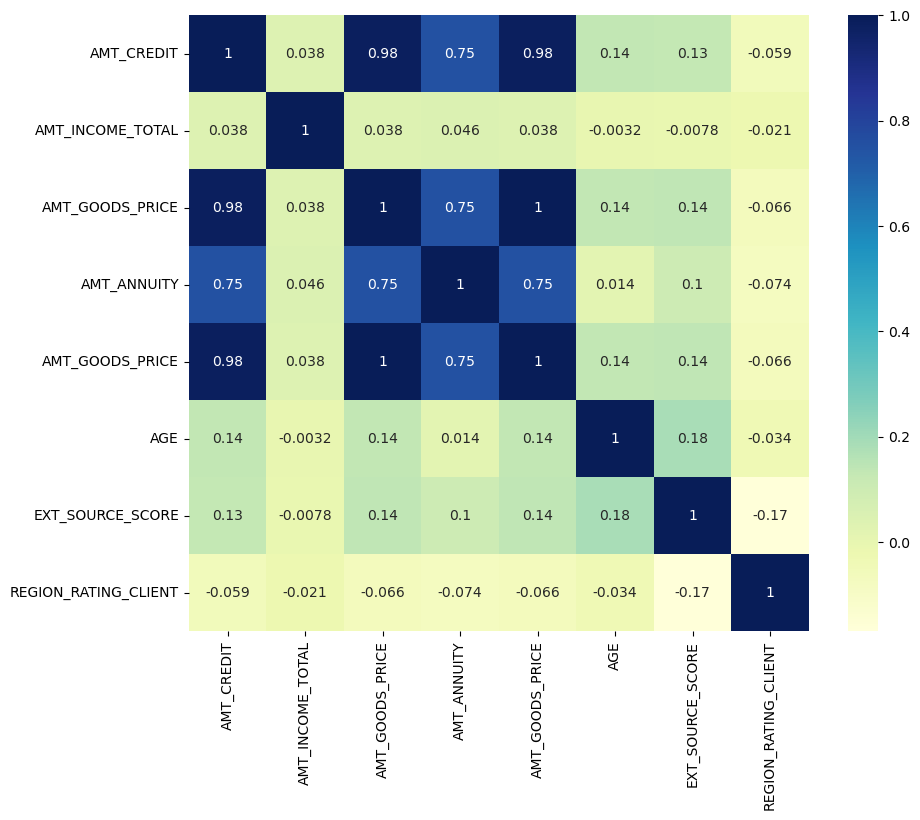

In [324]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cotarget_1.corr(),cmap="YlGnBu",annot=True)

In [ ]:
#Highly corelate columns for defaulters

#AMT_CREDIT and AMT_ANNUITY (0.75)
#AMT_CREDIT and AMT_GOODS_PRICE (0.1) - perfect correlation
#AMT_ANNUITY and AMT_GOODS_PRICE (0.75)


In [326]:
##Corelation of non defaulters
# Creating dataframe for numerical columns
df_cotarget_0 = new_app_filtered_target_0[correlation_columns]
df_cotarget_0.head()


,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
1,1293502.5,270000.0,1129500.0,35698.5,1129500.0,46,NaN,1
2,135000.0,67500.0,135000.0,6750.0,135000.0,53,0.64,2
3,312682.5,135000.0,297000.0,29686.5,297000.0,53,NaN,2
4,513000.0,121500.0,513000.0,21865.5,513000.0,55,NaN,2
5,490495.5,99000.0,454500.0,27517.5,454500.0,47,0.49,2


In [327]:
# Corelation matrix
df_cotarget_0.corr() 


,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_CREDIT,1.000000,0.342801,0.987253,0.771308,0.987253,0.047348,0.107626,-0.103334
AMT_INCOME_TOTAL,0.342801,1.000000,0.349461,0.418954,0.349461,-0.062542,0.045683,-0.186577
AMT_GOODS_PRICE,0.987253,0.349461,1.000000,0.776686,1.000000,0.044536,0.113823,-0.104379
AMT_ANNUITY,0.771308,0.418954,0.776686,1.000000,0.776686,-0.012288,0.100898,-0.132126
AMT_GOODS_PRICE,0.987253,0.349461,1.000000,0.776686,1.000000,0.044536,0.113823,-0.104379
AGE,0.047348,-0.062542,0.044536,-0.012288,0.044536,1.000000,0.183159,-0.002419
EXT_SOURCE_SCORE,0.107626,0.045683,0.113823,0.100898,0.113823,0.183159,1.000000,-0.193315
REGION_RATING_CLIENT,-0.103334,-0.186577,-0.104379,-0.132126,-0.104379,-0.002419,-0.193315,1.000000


<Axes: >

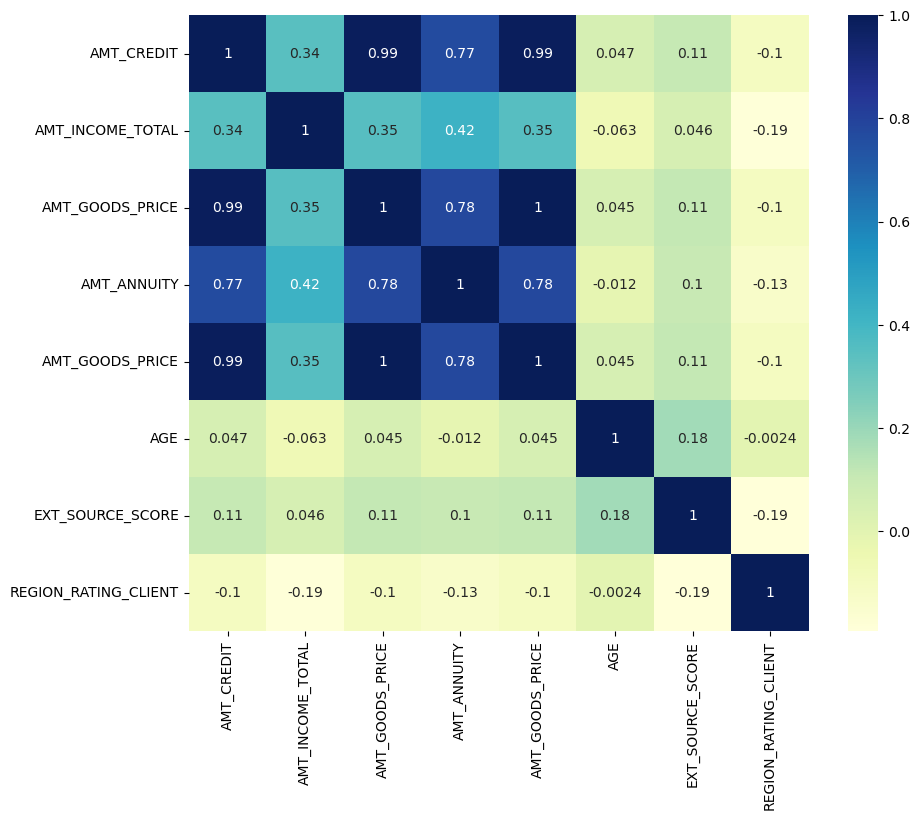

In [337]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cotarget_0.corr(),cmap="YlGnBu",annot=True)

In [ ]:
###Highly corelate columns for non defaulters

#AMT_CREDIT and AMT_ANNUITY (0.78)
#AMT_CREDIT and AMT_GOODS_PRICE (1)
#AMT_ANNUITY and AMT_GOODS_PRICE (0.78)


##Conclusion - We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.



In [ ]:
##Bivariate analysis on continious variable

Text(0.5, 1.0, 'Non Defaulters')

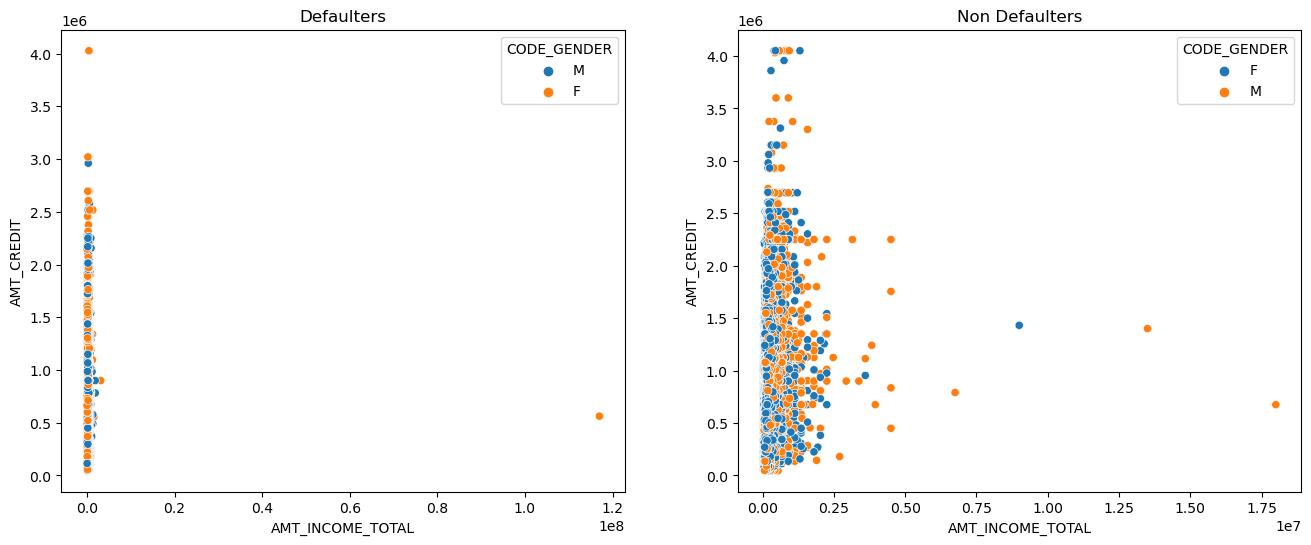

In [346]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='CODE_GENDER',data=new_app_filtered_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue = 'CODE_GENDER',data=new_app_filtered_target_0)
plt.title('Non Defaulters')

In [ ]:
#Analysis of the chart above
#Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
#Non defaulters - We can hardly figure out any pattern out of this.


Text(0.5, 1.0, 'Non Defaulters')

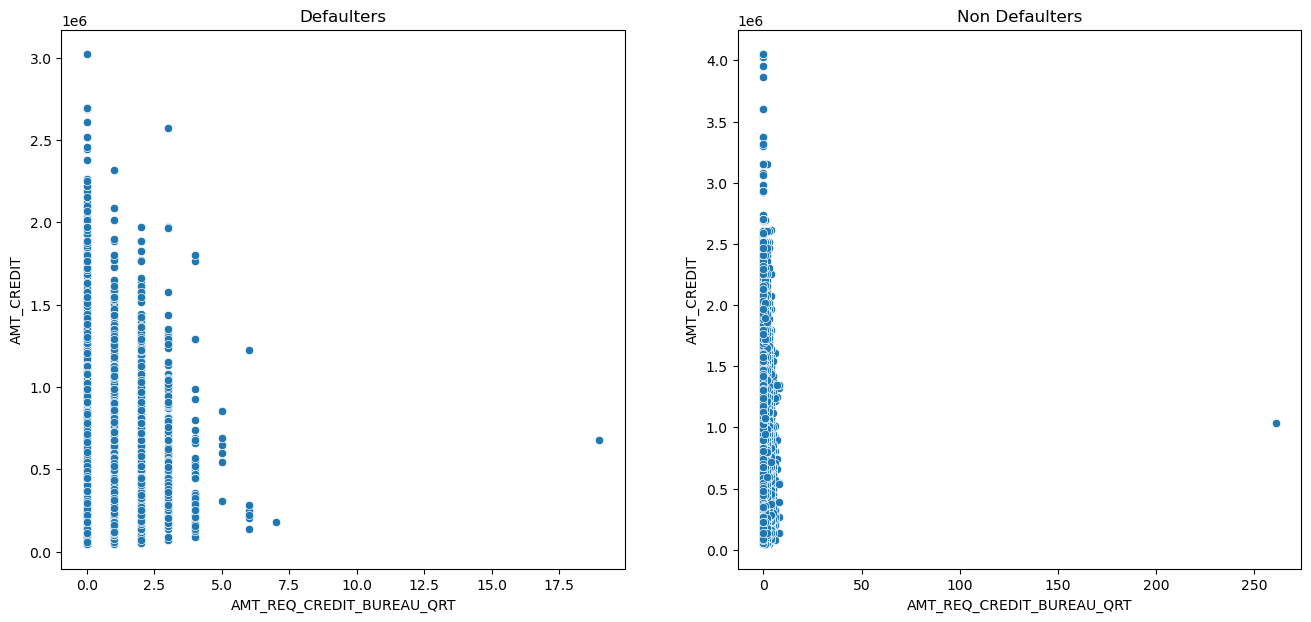

In [353]:
##Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT', data=new_app_filtered_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT', data=new_app_filtered_target_0)
plt.title('Non Defaulters')


In [ ]:
##Analysis of the chart
#We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

In [358]:
##Bivariate analysis on categorical variable
#Credit amount of the loan of various categories
# Category list
ctrs = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

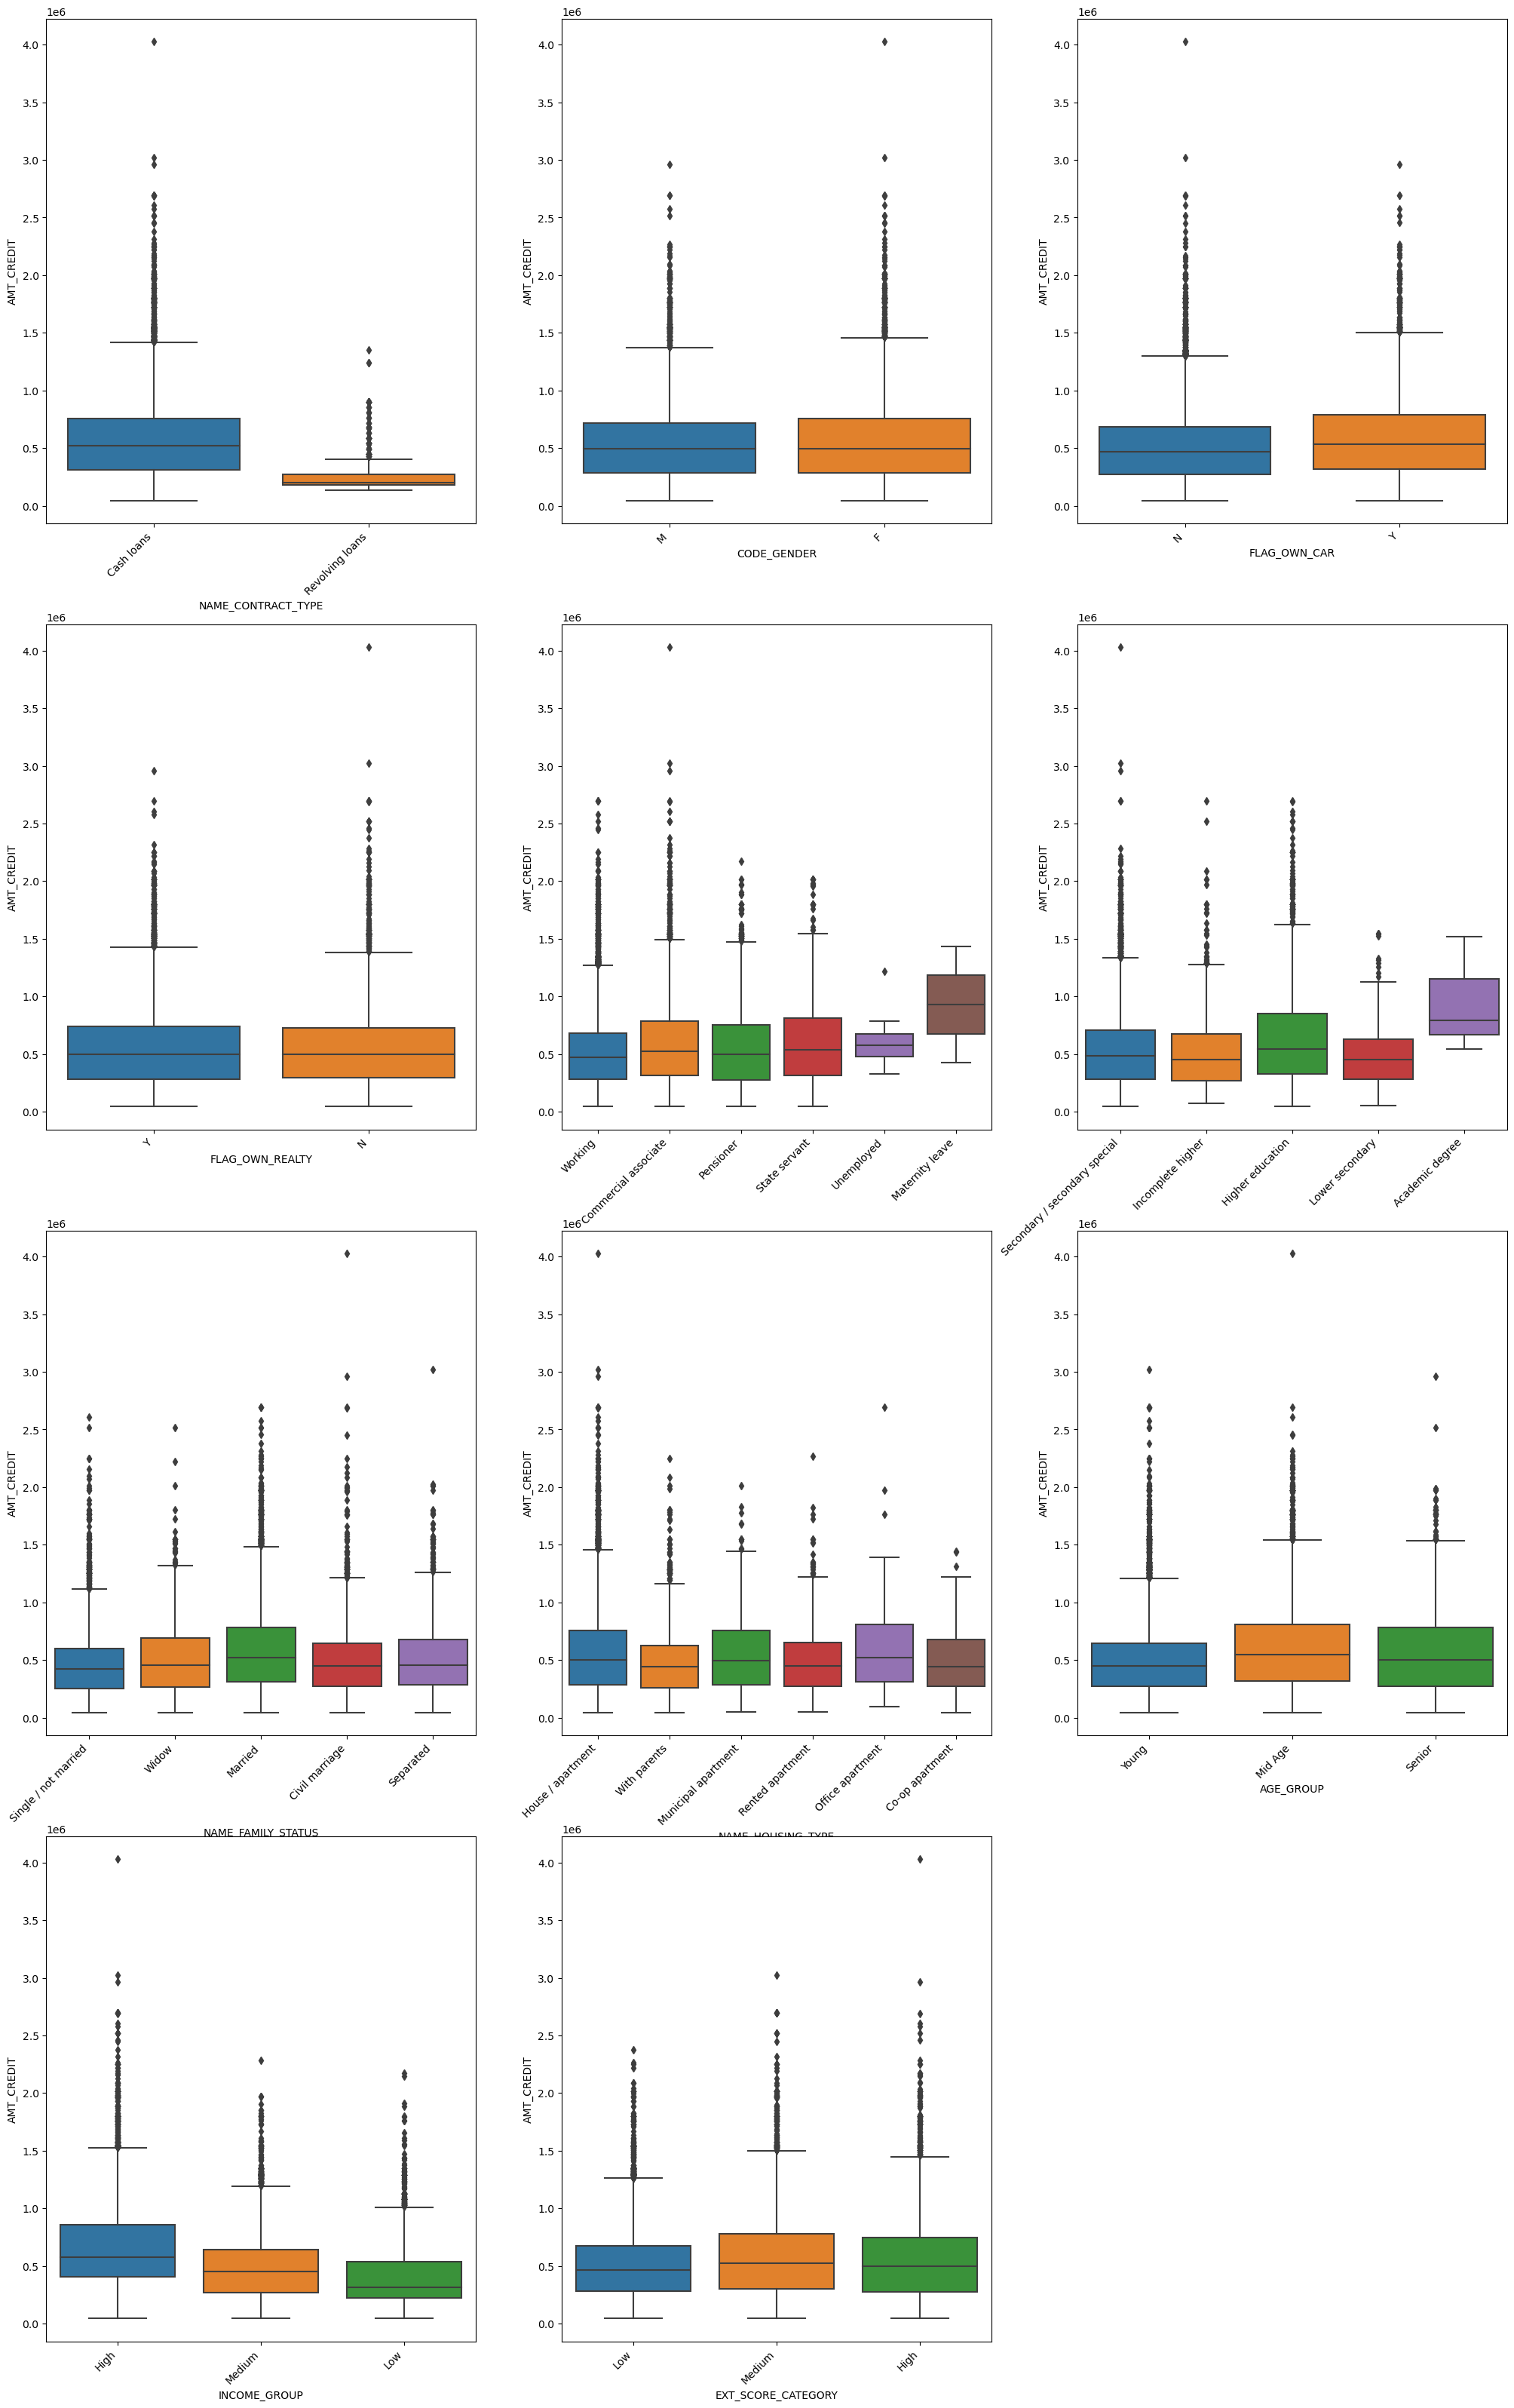

In [369]:
###Defaulters
plt.figure(figsize=(25,40))
k=0
for ctrs in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = ctrs, y = 'AMT_CREDIT', data=new_app_filtered_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


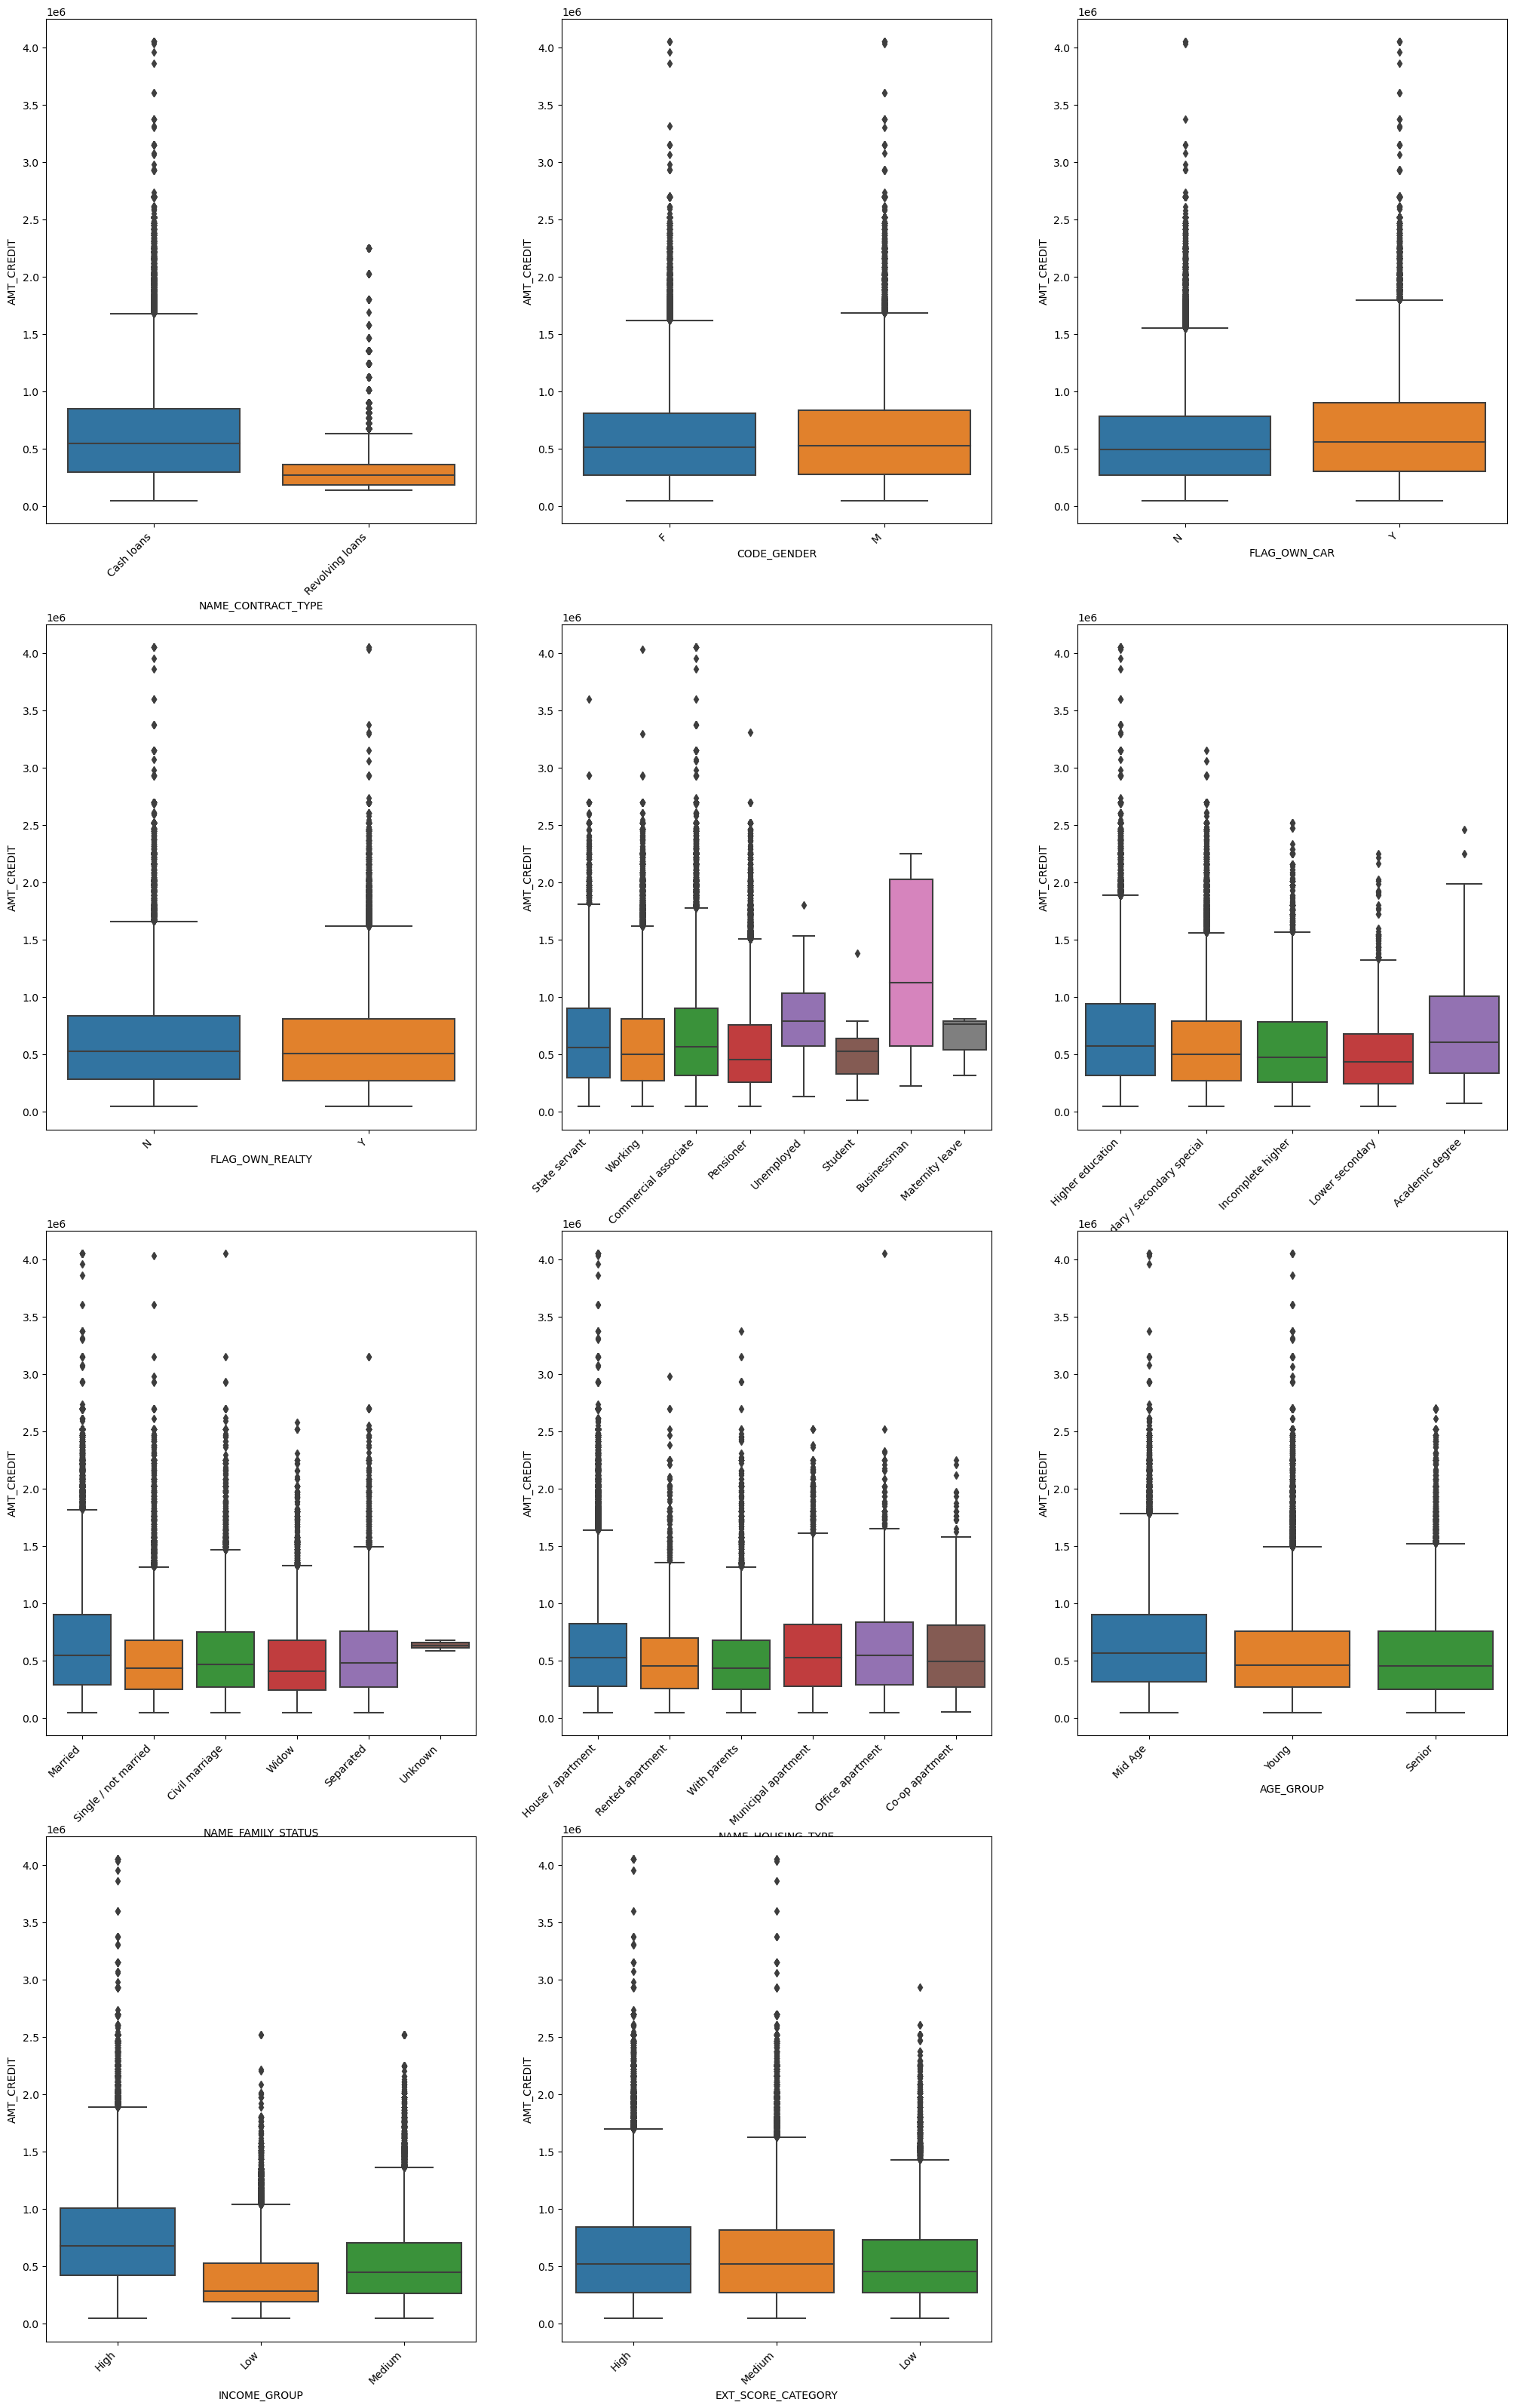

In [372]:
#Non-defaulters
plt.figure(figsize=(25,40))
k=0
for ctrs in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = ctrs, y = 'AMT_CREDIT', data=new_app_filtered_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


Text(0, 0.5, 'Defaulters')

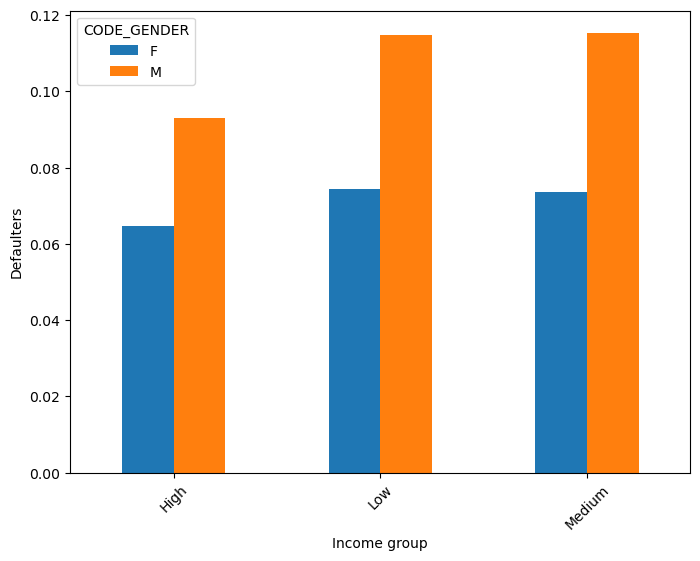

In [373]:
###Analysis of two segmented variables
#Income group and gender
new_app_filtered.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')


In [ ]:
##Analysis
#We can see that Males are more likely default than Females accross all income groups.

Text(0, 0.5, 'Defaulters')

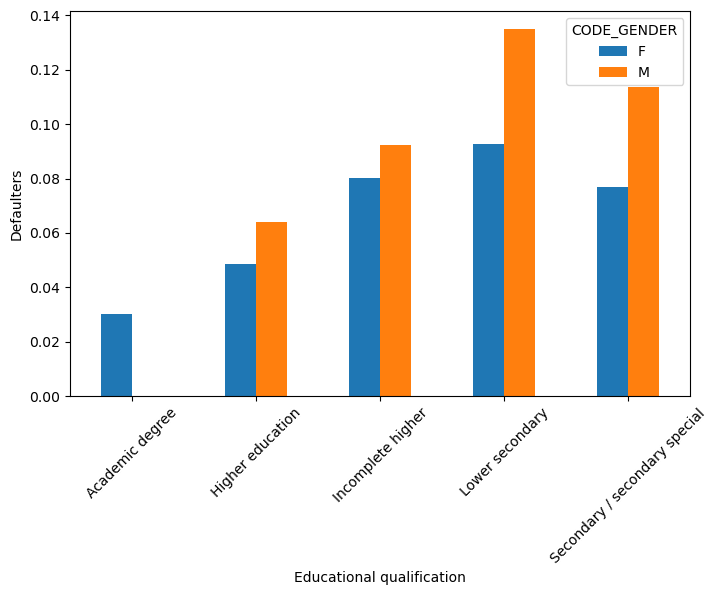

In [374]:
##Education and gender
new_app_filtered.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

In [ ]:
###Analysis
#1)Lower secondary educated female defaulted most followed by Secondary and Incomplete higher educated females.
#2)The Higher educated people are less defaulted.
#3)Accross all educated level Females are less defaulted than male
#4)Academic degree Females did not default at all

Text(0, 0.5, 'Defaulters')

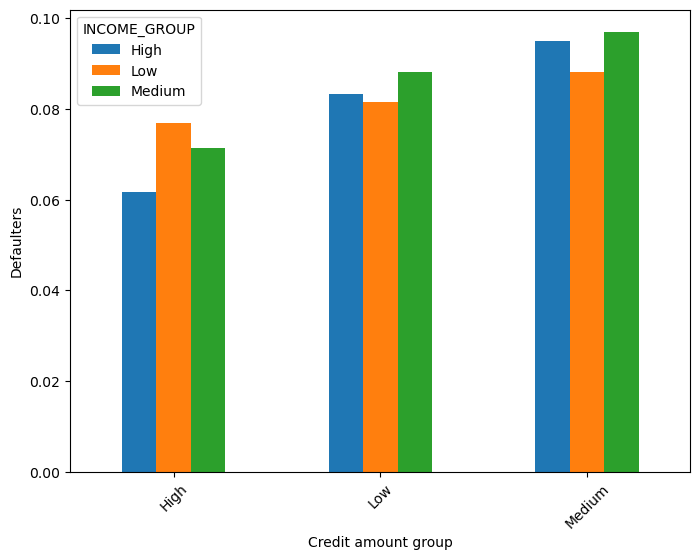

In [375]:
#Credit amount group and Income group
new_app_filtered.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')


In [376]:
##Analysis of the above chart
#1) Medium credit amount group are defaulted the most in all income groups.
#2) High credit amount groups are less likely to default in all income groups.


Text(0, 0.5, 'Defaulters')

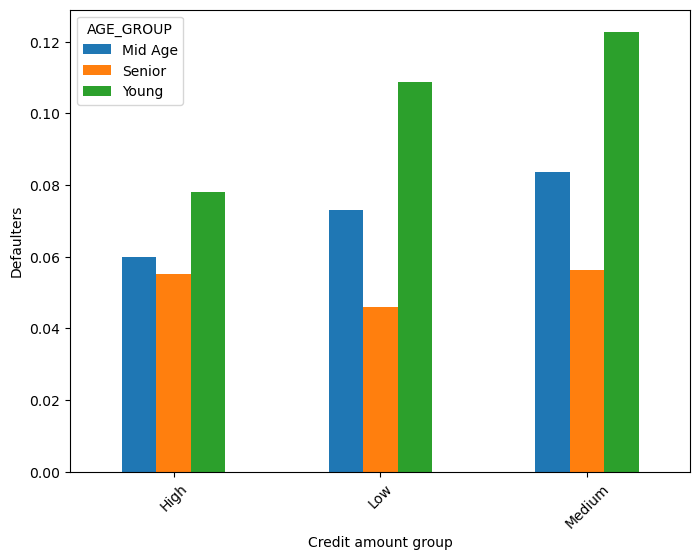

In [377]:
#Credit amount group and Age group
new_app_filtered.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')


Text(0, 0.5, 'Defaulters')

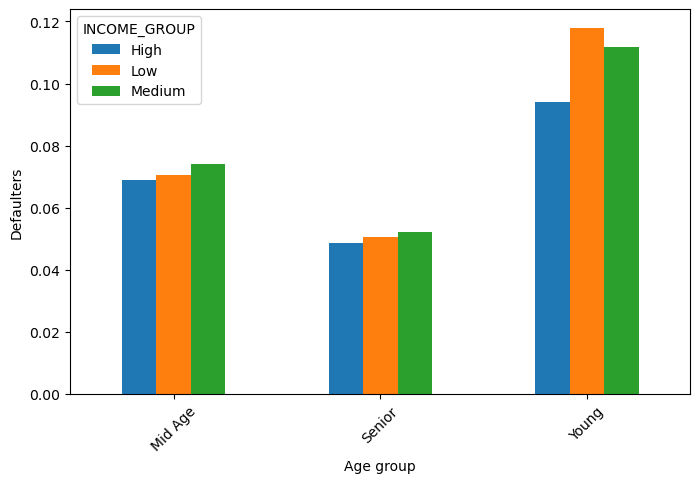

In [378]:
##Age group and Income group
new_app_filtered.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')


Text(0, 0.5, 'Defaulters')

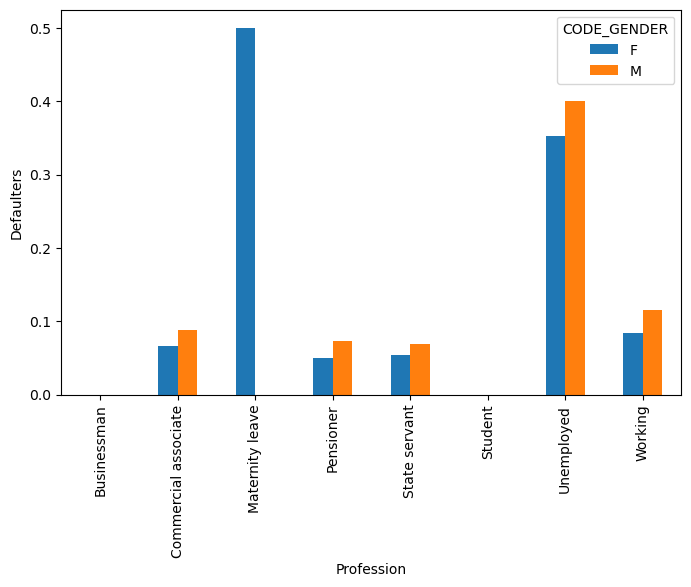

In [379]:
##Profession and Gender
new_app_filtered.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')


Text(0, 0.5, 'Defaulters')

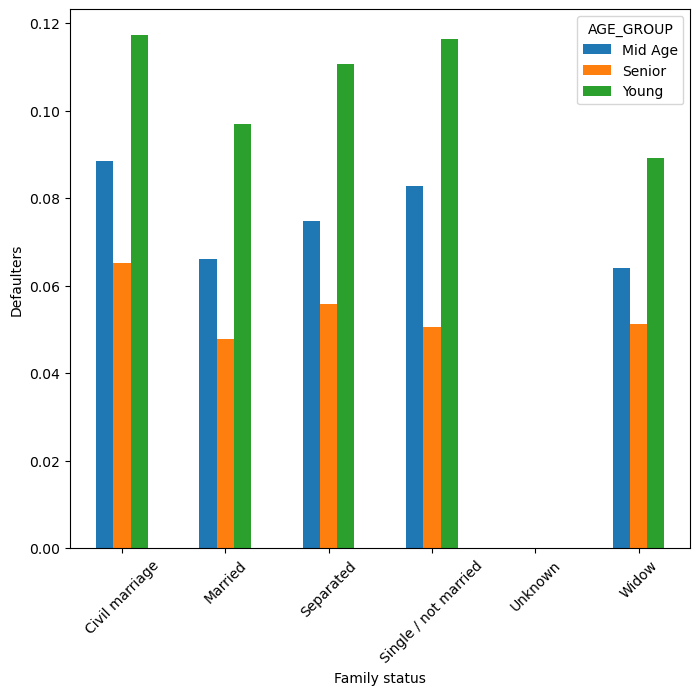

In [380]:
##Family status and age group
new_app_filtered.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')


Text(0, 0.5, 'Defaulters')

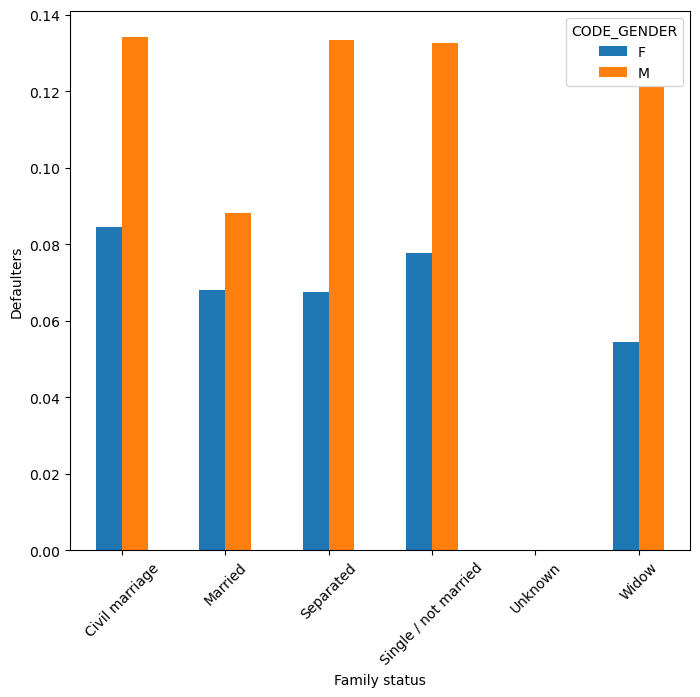

In [381]:
##Family status and gender
new_app_filtered.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')


In [589]:
##Previous application

df_appl_previous = pd.read_csv('previous_application.csv')

In [590]:
df_appl_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [591]:
##Handaling missing values in columns
#Replacing all the XNA and XAP to np.null Because looks like these values entered in the application as blank or may be not applicable.

df_appl_previous.replace('XNA',np.nan,inplace=True)
df_appl_previous.replace('XAP',np.nan,inplace=True)

In [592]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_appl_previous.columns[(round(100*(df_appl_previous.isnull().sum()/len(df_appl_previous.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values


['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [593]:
# Delete the columns having more than 30% missing values
df_appl_previous = df_appl_previous.drop(cols_30_percent_missing_values,axis=1)

In [594]:
df_appl_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [595]:
cols_redundant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [596]:
# Delete the columns which are irrelevant for the analysis
df_appl_previous = df_appl_previous.drop(cols_redundant,axis=1)


In [597]:
df_appl_previous.shape

(1670214, 15)

In [598]:
#Treating Missing Values in Rows
#Step1) Count the number of rows whic have more than 50% missing values
#Step2) As there are none of the rows, so we are not deleting rows on basis of this
len(df_appl_previous[df_appl_previous.isnull().sum(axis=1) > (len(df_appl_previous.columns)//2)].index)


0

In [599]:
# Percent of missing values in columns
(round(100*(df_appl_previous.isnull().sum()/len(df_appl_previous.index)),2))

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [600]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(df_appl_previous[np.isnan(df_appl_previous['AMT_ANNUITY']) & np.isnan(df_appl_previous['CNT_PAYMENT']) & np.isnan(df_appl_previous['AMT_GOODS_PRICE'])])

333855

In [601]:
df_appl_previous = df_appl_previous[(~(np.isnan(df_appl_previous['AMT_ANNUITY']) & np.isnan(df_appl_previous['AMT_GOODS_PRICE']) & np.isnan(df_appl_previous['CNT_PAYMENT'])))]

In [602]:
df_appl_previous.shape

(1336359, 15)

In [603]:
(round(100*(df_appl_previous.isnull().sum()/len(df_appl_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [604]:
# Count the rows for which AMT_ANNUITY is empty
len(df_appl_previous[np.isnan(df_appl_previous['AMT_ANNUITY'])])

38380

In [605]:
#lets delete these records
df_appl_previous = df_appl_previous[~(np.isnan(df_appl_previous['AMT_ANNUITY']))]

In [606]:
df_appl_previous.shape

(1297979, 15)

In [607]:
(round(100*(df_appl_previous.isnull().sum()/len(df_appl_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [608]:
df_appl_previous.shape

(1297979, 15)

In [ ]:
##Removing outliers

In [609]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']

for col in col_outlier: 
    q1 = df_appl_previous[col].quantile(0.25)
    q3 = df_appl_previous[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    df_appl_previous = df_appl_previous.loc[(df_appl_previous[col] > range_low) & (df_appl_previous[col] < range_high)]
        

df_appl_previous.shape

(839576, 15)

In [518]:
df_appl_previous.shape

(839576, 15)

In [610]:
# Percentage of rows lost
round((100 - 100*(len(df_appl_previous.index)/1670214)),2)


49.73

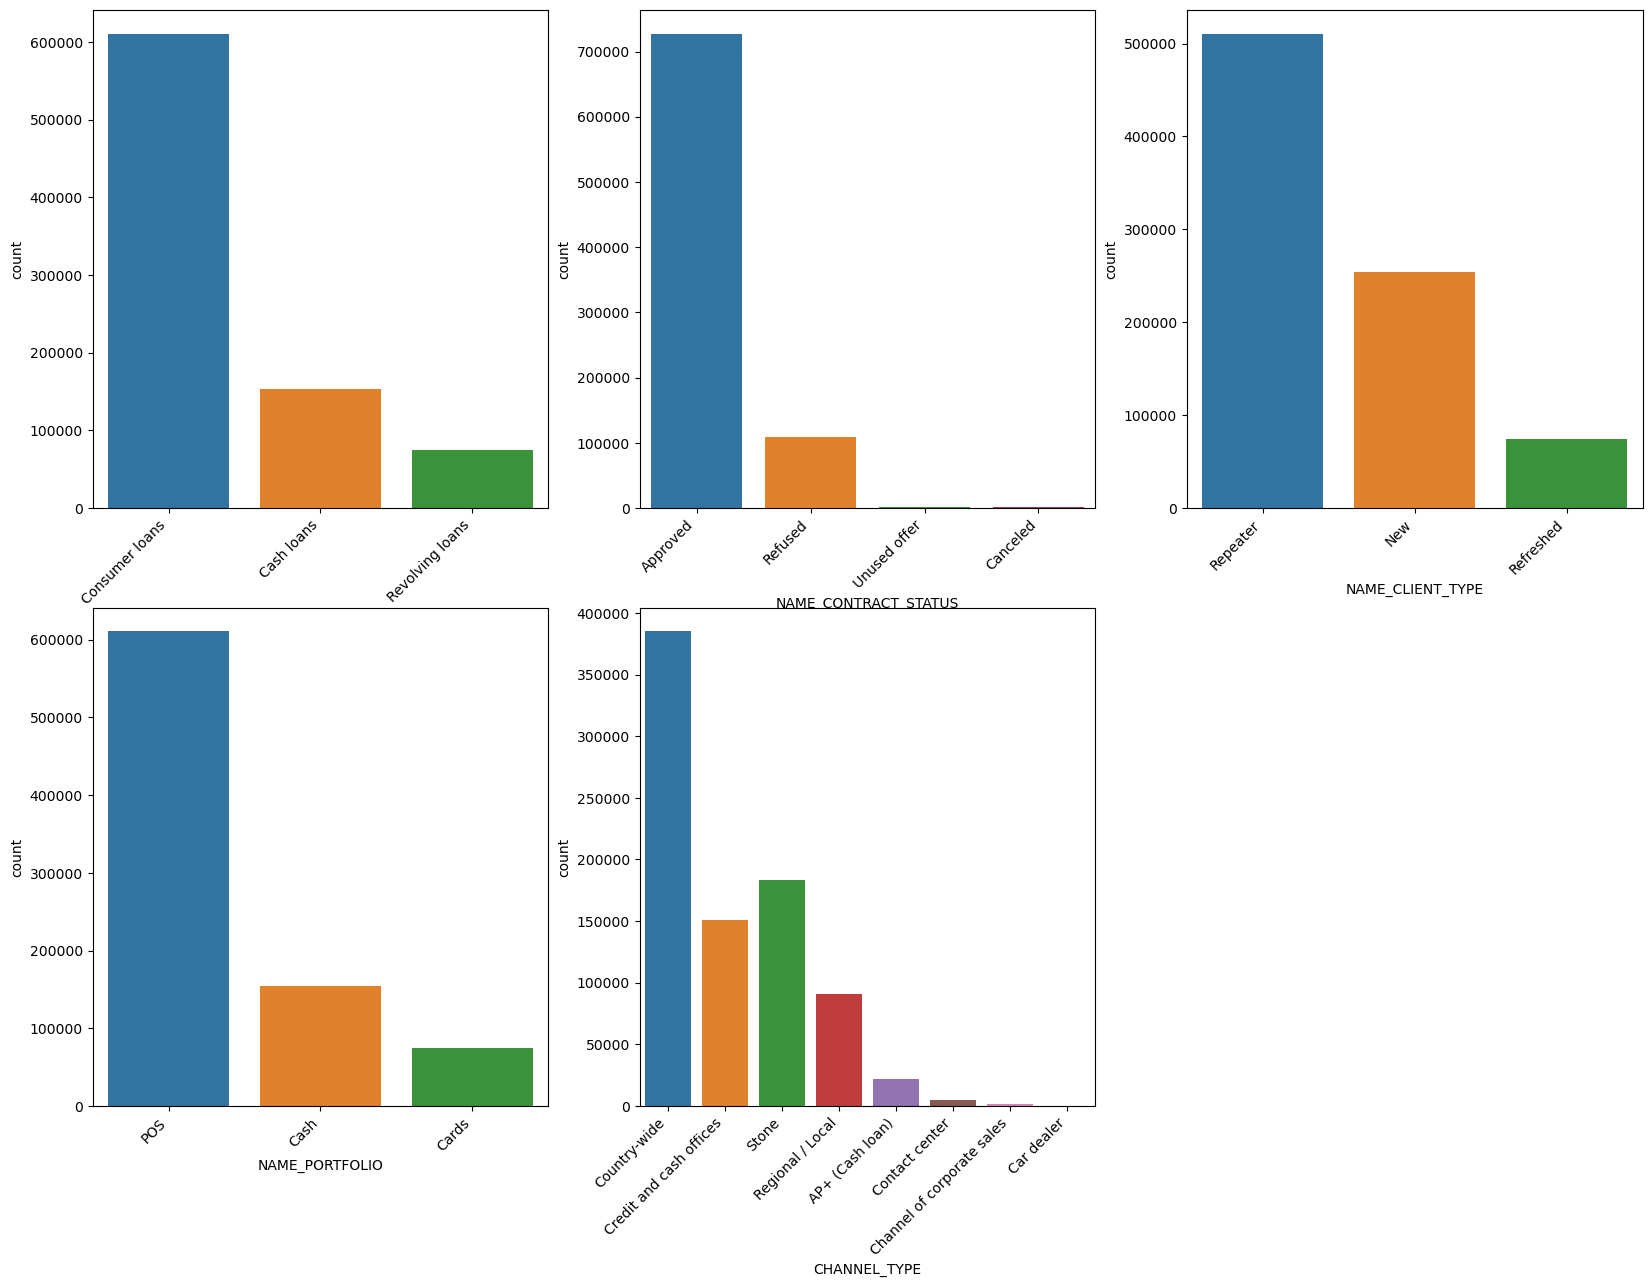

In [611]:
###Checking data imbalance
# Listing columns for check data imbalance and plotting them
list_col = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']          
k=0
plt.figure(figsize=(20,22))
for col in list_col:    
    k=k+1
    plt.subplot(3, 3,k)    
    ax = sns.countplot(x = col , data = df_appl_previous)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [615]:
###Merging Current application and Previous application dataset
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [616]:
# Creating a dataset from current application for merging 
df_current_to_merge = new_app_filtered[cols_current]
df_current_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,100002,1,M,Secondary / secondary special,Single / not married,Young,High,Low
1,100003,0,F,Higher education,Married,Mid Age,High,High
2,100004,0,M,Secondary / secondary special,Single / not married,Mid Age,Low,High
3,100006,0,F,Secondary / secondary special,Civil marriage,Mid Age,Medium,High
4,100007,0,M,Secondary / secondary special,Single / not married,Mid Age,Medium,High


In [617]:
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [618]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = df_appl_previous.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,-73,Repeater,POS,Country-wide,12.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,-301,Repeater,Cash,Credit and cash offices,12.0
13,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,Approved,-408,New,POS,Country-wide,8.0
14,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,Approved,-726,New,POS,Stone,3.0
15,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,-699,New,POS,Regional / Local,6.0


In [619]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,-73,Repeater,POS,Country-wide,12.0,0.0,F,Incomplete higher,Married,Mid Age,High,High
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,-301,Repeater,Cash,Credit and cash offices,12.0,0.0,F,Secondary / secondary special,Married,Young,Low,High
2,1397919,321676,Consumer loans,7654.860,53779.5,57564.0,Approved,-408,New,POS,Country-wide,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2273188,270658,Consumer loans,9644.220,26550.0,27252.0,Approved,-726,New,POS,Stone,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,-699,New,POS,Regional / Local,6.0,0.0,M,Secondary / secondary special,Married,Young,High,High


In [620]:
df_merged.shape


(839576, 19)

In [621]:
len(df_merged[np.isnan(df_merged['TARGET'])])

122340

In [622]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         

In [624]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')
df_merged.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,-73,Repeater,POS,Country-wide,12.0,0,F,Incomplete higher,Married,Mid Age,High,High
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,-301,Repeater,Cash,Credit and cash offices,12.0,0,F,Secondary / secondary special,Married,Young,Low,High
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,-699,New,POS,Regional / Local,6.0,0,M,Secondary / secondary special,Married,Young,High,High
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,Approved,-1473,Repeater,POS,Stone,8.0,0,M,Secondary / secondary special,Married,Mid Age,Medium,High
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Refused,-584,Repeater,Cash,AP+ (Cash loan),18.0,0,M,Secondary / secondary special,Married,Senior,High,Low


In [643]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,EXT_SCORE_CATEGORY,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,Approved,-73,Repeater,POS,Country-wide,12.0,0,F,Incomplete higher,Married,Mid Age,High,High,100.00
1,2523466,122040,Cash loans,15060.735,112500.0,136444.5,Approved,-301,Repeater,Cash,Credit and cash offices,12.0,0,F,Secondary / secondary special,Married,Young,Low,High,121.28
4,1232483,151612,Consumer loans,21307.455,126490.5,119853.0,Approved,-699,New,POS,Regional / Local,6.0,0,M,Secondary / secondary special,Married,Young,High,High,94.75
5,2163253,154602,Consumer loans,4187.340,26955.0,27297.0,Approved,-1473,Repeater,POS,Stone,8.0,0,M,Secondary / secondary special,Married,Mid Age,Medium,High,101.27
7,1173070,199178,Cash loans,4666.500,45000.0,49455.0,Refused,-584,Repeater,Cash,AP+ (Cash loan),18.0,0,M,Secondary / secondary special,Married,Senior,High,Low,109.90


In [ ]:
##Univariate analysis on unordered categorical variable
#Previous Loan status


[Text(0.5, 0, 'Loan status')]

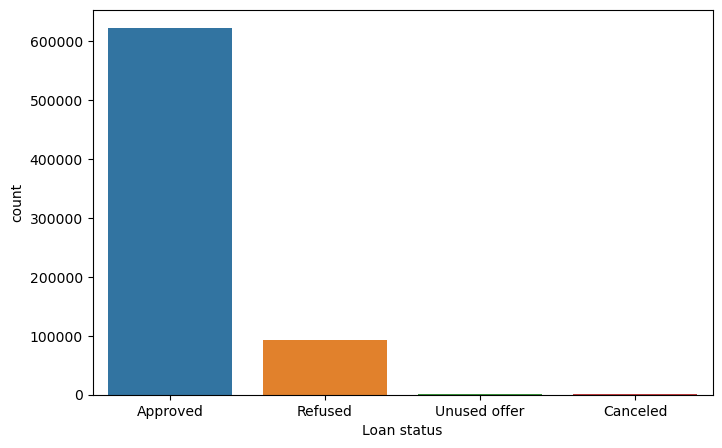

In [626]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')

[Text(0.5, 0, 'Client type')]

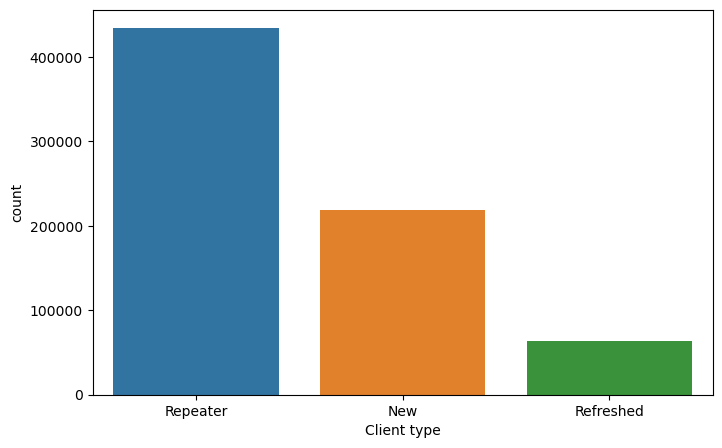

In [627]:
##Client type
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')


[Text(0.5, 0, 'Portfolio')]

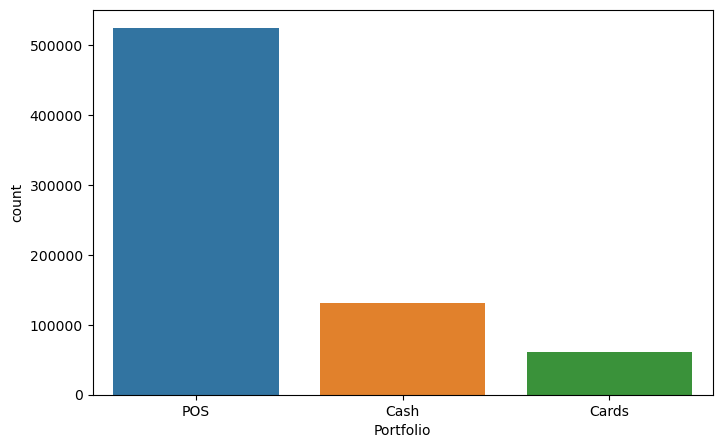

In [628]:
##Portfolio of the previous applications
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')


Application channel type

[Text(0.5, 0, 'Application channel')]

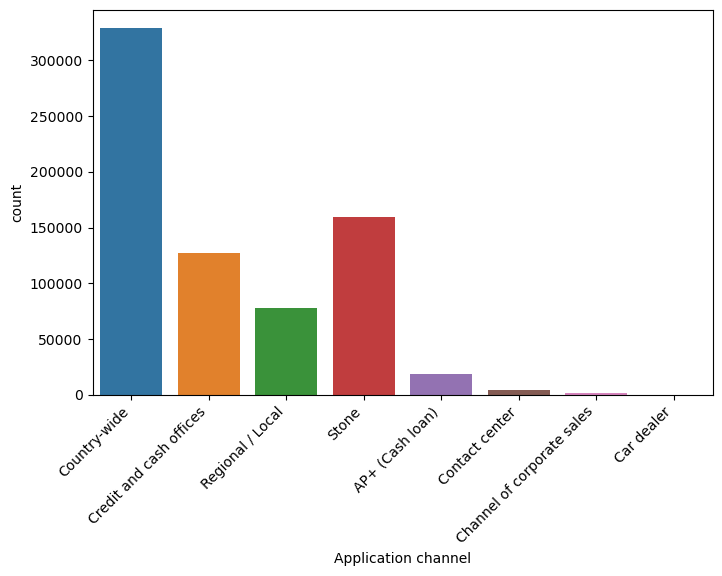

In [632]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

 Univariate analysis for continious variables
Applied loan amount


[Text(0.5, 0, 'Application amount')]

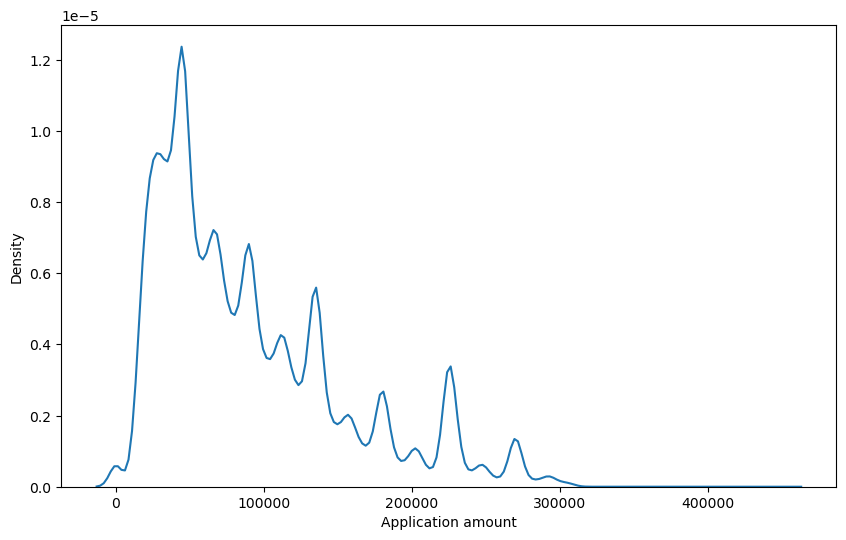

In [633]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

Credited loan amount

[Text(0.5, 0, 'Credited amount')]

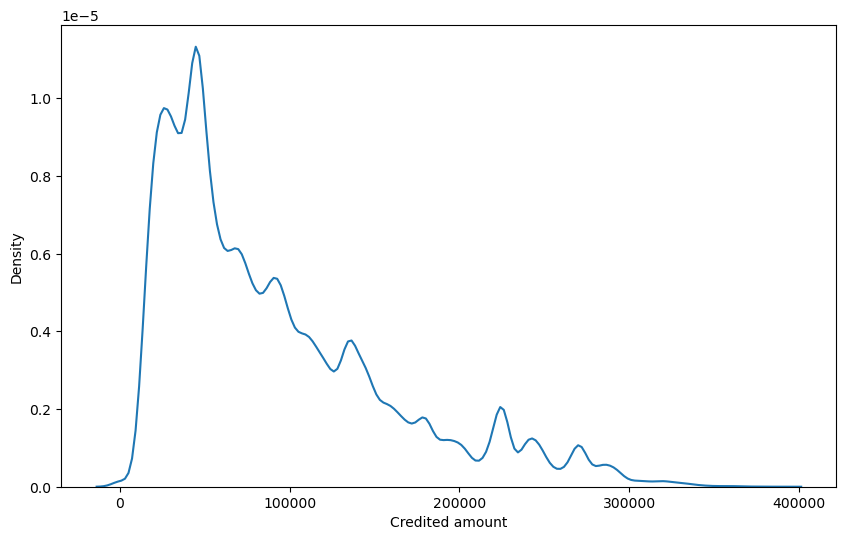

In [634]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')


Bivariate analysis

In [645]:
# Listing the relevant columns for corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT']

In [646]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT
0,17145.0,17145.0,1730.430,100.00,12.0
1,112500.0,136444.5,15060.735,121.28,12.0
4,126490.5,119853.0,21307.455,94.75,6.0
5,26955.0,27297.0,4187.340,101.27,8.0
7,45000.0,49455.0,4666.500,109.90,18.0


In [664]:
# Corelation matrix
df_merged_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT
AMT_APPLICATION,1.000000,0.964598,0.802144,0.148344,0.217321
AMT_CREDIT,0.964598,1.000000,0.803077,0.312772,0.244656
AMT_ANNUITY,0.802144,0.803077,1.000000,0.195193,0.161197
PERCENT_CREDIT,0.148344,0.312772,0.195193,1.000000,0.288488
CNT_PAYMENT,0.217321,0.244656,0.161197,0.288488,1.000000


<Axes: >

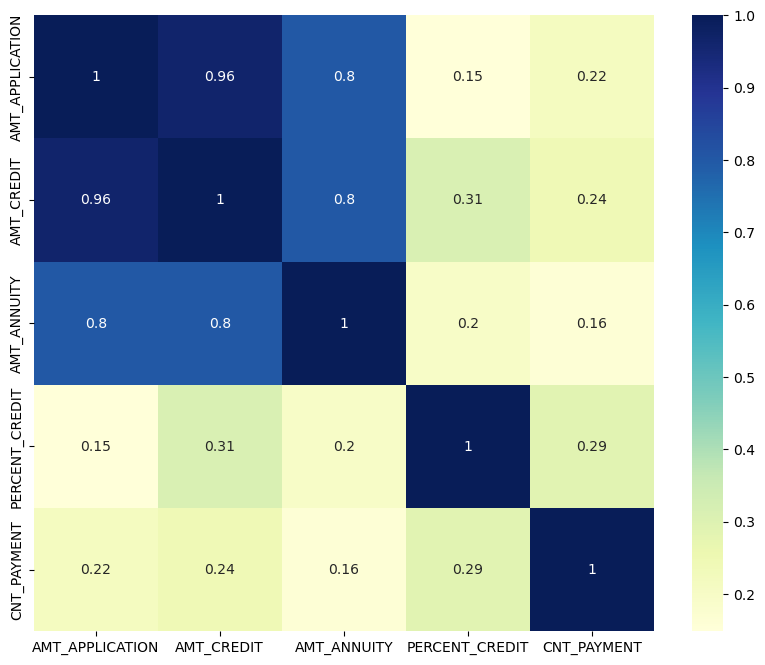

In [665]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)

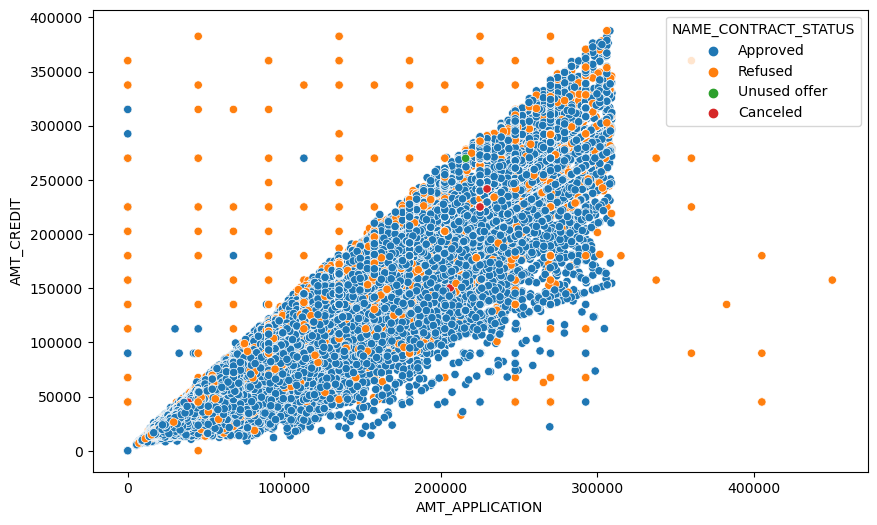

In [660]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)

Analysis:
We can see that the applications are more concentrated on the lesser amount and so as the credited amount. 



Application amount and the month taken to take decision related to current application


TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 1000x600 with 0 Axes>

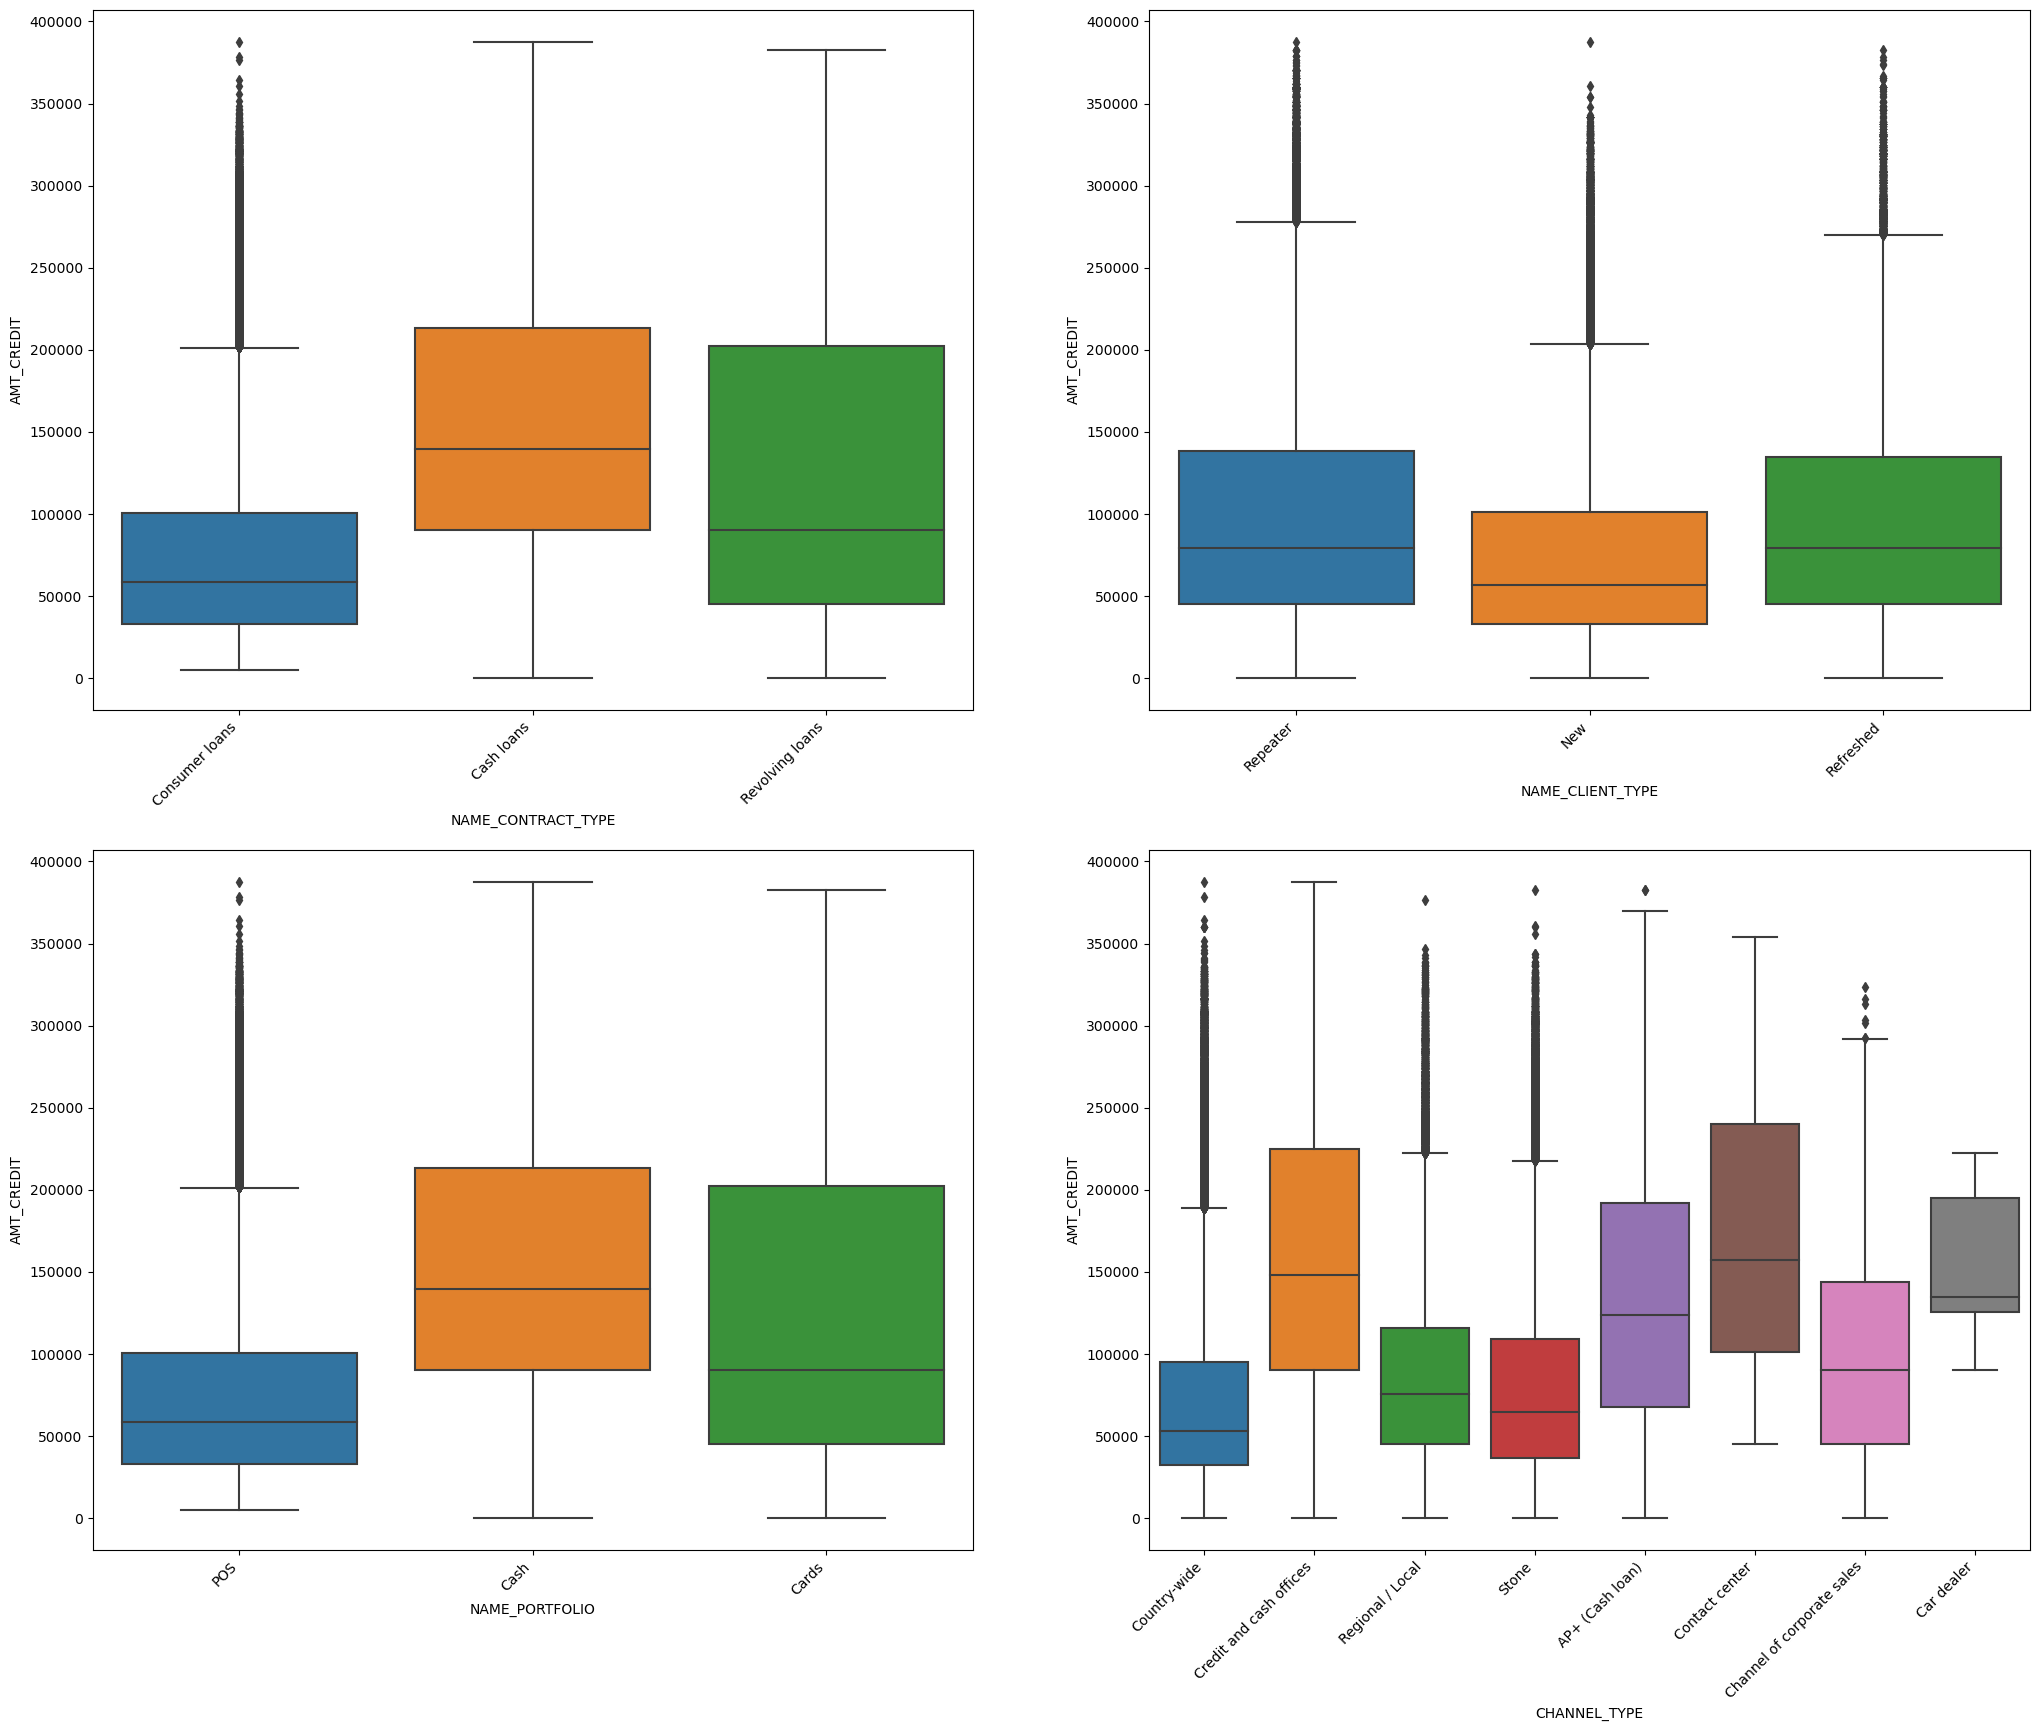

In [672]:
#Bivariate analysis on categorical variable
#Credit amount of the loan of various categories
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


Analysis:
1) Cash loans are credited more than Revolving and Consumer loans.
2) Repeater clients get more amount loan than new clients and refreshed clients.
3) The loan with portfolio Cars are credited more followed by Cash.
4) The credit amount of the loan is more from the application channel type 

Anslysis of two segmented variables


<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

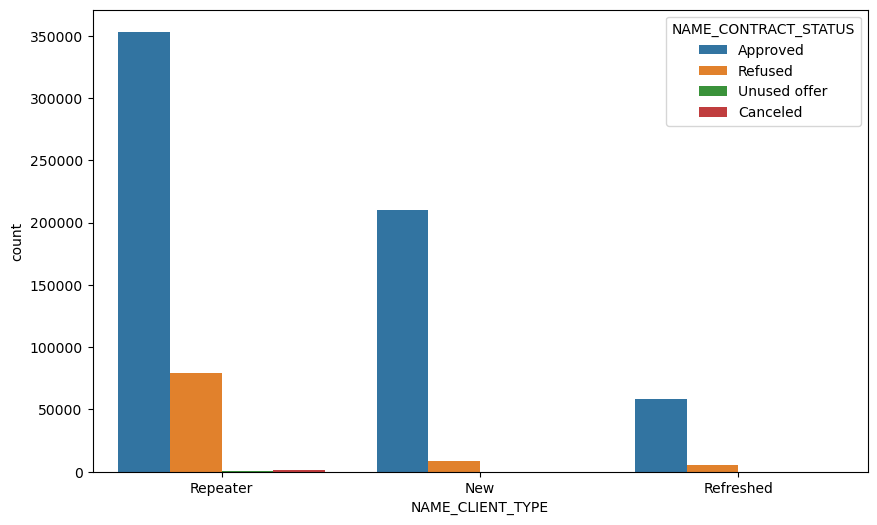

In [674]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )

Analysis
We see that the Repeater clients have more approved loans than New and Refreshed clients.

Text(0, 0.5, 'Current defaulters')

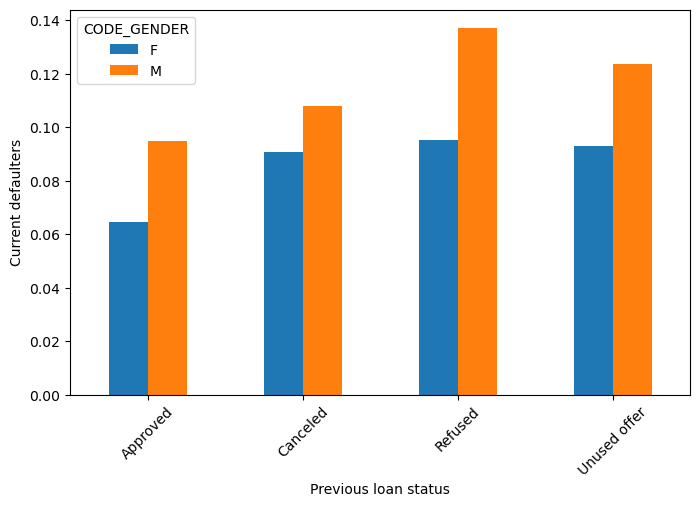

In [675]:
##Current loan defaulter status with respect to previous loan application status
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


Analysis: We can see that the Refused Males have the highest defaluters, followed by Unused Offer, followed by Cancelled, followed by Approved. Females follow the same trend

Current loan defaulter status with respect to previous loan application status and client types

Text(0, 0.5, 'Current defaulters')

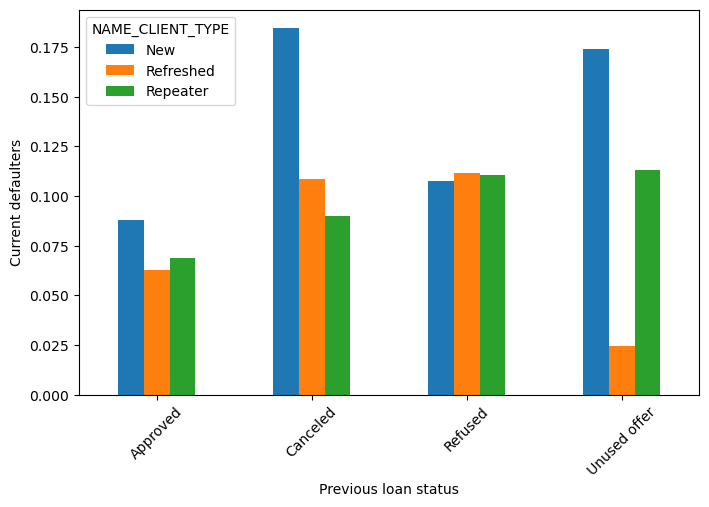

In [676]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

Analysis:

1)We can see that the Defaulters are more for Cancelled status who are New users

2)For Unused Offer status - the New clients were more defaulted followed by Repeater followed by Refreshed users.

3)For previously Refused applicants the Defaulters are more Refreshed clients.

4)For previously Canceled applicants the Defaulters are more New clients.


Text(0, 0.5, 'Current defaulters')

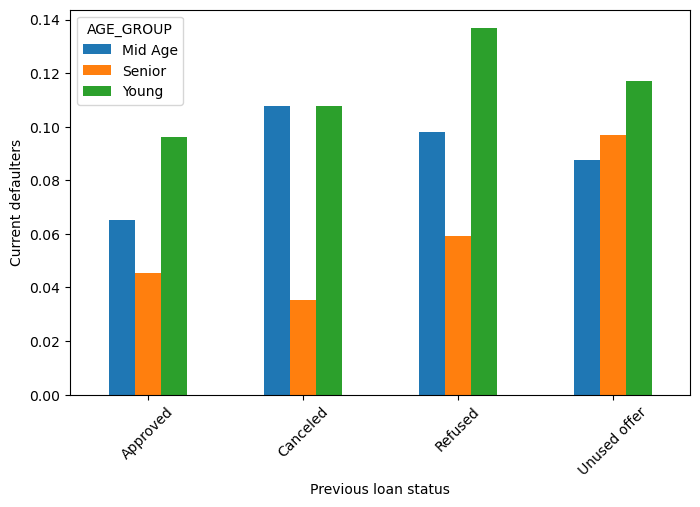

In [677]:
##Current loan defaulter status with respect to previous loan application status and age group
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


Analysis
1) For all the status Young applicants are more defaulted.
2) For all the previous status Senior applicants are less defaulted compared to others.


Current loan defaulter status with respect to previous loan application status and income group

Text(0, 0.5, 'Current defaulters')

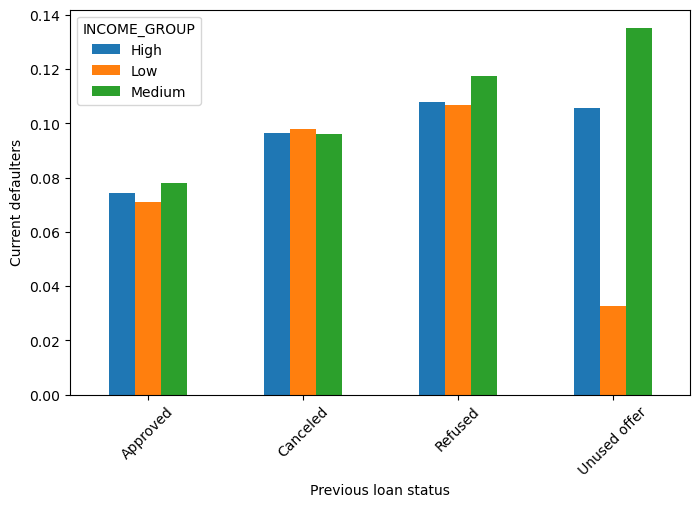

In [680]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


Analysis:
1) For previously Unused offer the Medium income group was more defaulted and Low income group is the least.
2) For other application status more or less all the income groups are equally defaulted.


Current loan defaulter status with respect to previous loan application status and portfolio of the loan

Text(0, 0.5, 'Current defaulters')

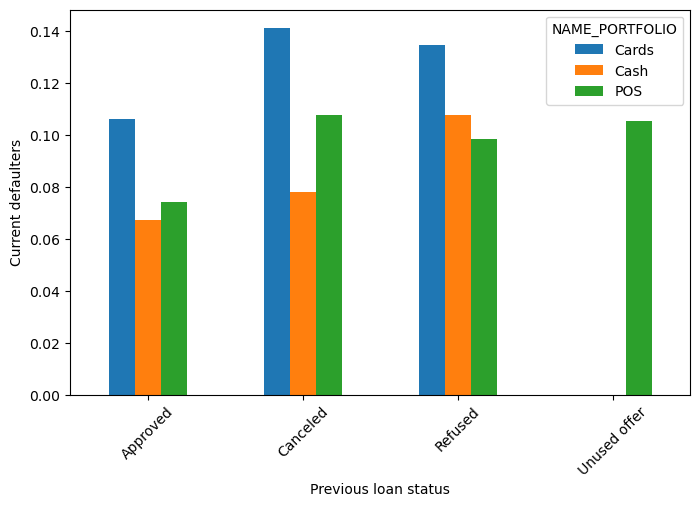

In [681]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


Analysis:
1) Most of the clients were defaulted, who previously applied loan for Cards.
2) For approved loan status the clients applied for Cars are less defaulted.
3) For Refused loan status the clients applied for POS are less defaulted.


Text(0, 0.5, 'Current defaulters')

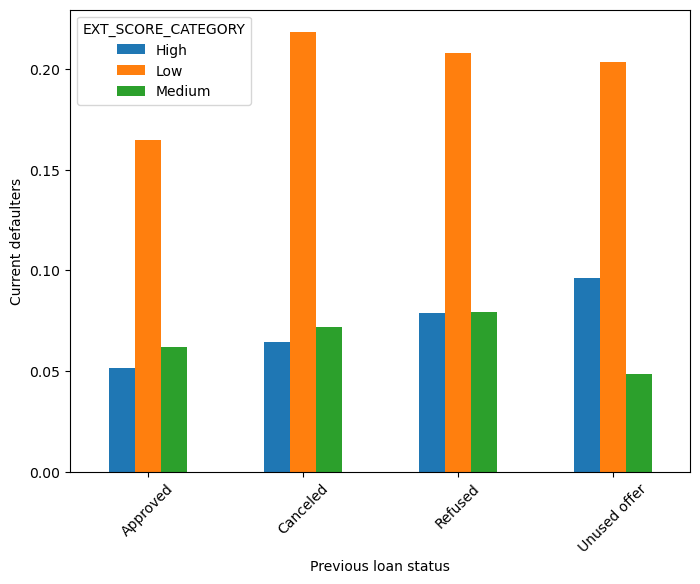

In [682]:
#Current loan defaulter status with respect to previous loan application status and external source score category
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')


Analysis:
1) Applicants with low external source score defaulted the most.
2) Higher scorer applicants are very ulikely to default irrespective of their previous loan status.